<h4 align="center">Lab n°3 de Machine Learning<small> - réalisé par DMiners - 4DS1</small></h4>
<h1 align="center">Analyse prédictive des sinistres automobiles corporels</h1><br><br><br>
<h2>Contexte du projet</h2><br>
En mars 2010, l’Assemblée générale des Nations Unies a adopté la résolution A/RES/64/255, par laquelle elle proclame la décennie 2011-2020 <strong>Décennie d’action pour la sécurité routière</strong> en vue de stabiliser puis de réduire le nombre prévu de décès imputables aux accidents de la route dans le monde en multipliant les activités menées aux niveaux national, régional et mondial.<br>

Suite à un appel d'offre de la part du gouvernement francais; visant une étude complète de l'efficacité de cette campagne de sensibilisation menée par les Nations Unies, et quelles mesures métiers pragmatiques à prendre, nous sommes ainsi amenés à créer un Dashboard de support pour les projets d'intervention et maintenance au niveau de la structure de la carte routière, en fournissant des prédictions temporelles permettant de prévoir les détails des années prochaines concernant notre étude pour soutenir les services de santé et de secours SOS.
<table><tr><td><img src="frImg.png" width="250px"></td><td><img src="UNlogo.jpg" width="150px"></td><td><img src="decennie.jpg" width="150px"></td></tr></table><br>
<h2>Données entre sources et analyse</h2><br>
Dans ce cas d’étude, pour achever nos objectifs métier, on sera donc amené à passer par une étude intensive des données. On s'intéressera ainsi aux statistiques de cette période de la décennie courante 2011-2017 en prenant de même, l'année 2010 comme année de référence de ce qui précède. Pour les mêmes raisons, une telle étude nécessite qu'on ait une vision globale au niveau des données analysées, c'est pour cela qu'on aura aussi recours au mine et chargement de données depuis différentes ressources externes.<br><br>

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# caracteristiques dataframes import
carac_list = []
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2010.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2011.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2012.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2013.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2014.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2015.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2016.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2017.csv", encoding="ISO-8859-1", dtype='unicode'))

# décodage colonnes
for carac in carac_list:
    carac.rename(columns={
        'Num_Acc':'num_acc',
        'hrmn':'heure_min',
        'agg':'localisation',
        'int':'intersection',
        'atm':'meteo',
        'col':'type_collision',
        'com':'commune',
        'dep':'departement'
    }, inplace=True)
    carac.drop(['long', 'lat', 'adr', 'gps'], axis=1, inplace=True)

# lieux dataframes import
lieux_list = []
lieux_list.append(pd.read_csv("data/datagov/lieux_2010.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2011.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2012.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2013.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2014.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2015.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2016.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2017.csv", encoding="ISO-8859-1", dtype='unicode'))

# décodage colonnes
for lieux in lieux_list:
    lieux.rename(columns={
        'Num_Acc':'num_acc',
        'catr':'categorie_route',
        'voie':'numero_route',
        'circ':'regime_circulation',
        'nbv':'nbre_voies',
        'vosp':'voie_reserv_exist',
        'prof':'declivite_route_acc',
        'plan':'align_route',
        'lartpc':'largeur_tpc',
        'larrout':'largeur_route',
        'surf':'etat_surface',
        'infra':'infrastructure',
        'situ':'local_accident',
        'env1':'proximite_ecole'
    }, inplace=True)
    lieux.drop(['v1', 'v2', 'pr', 'pr1'], axis=1, inplace=True)

# usagers dataframes import
usagers_list = []
usagers_list.append(pd.read_csv("data/datagov/usagers_2010.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2011.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2012.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2013.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2014.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2015.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2016.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2017.csv", encoding="ISO-8859-1", dtype='unicode'))

# décodage colonnes
for usagers in usagers_list:
    usagers.rename(columns={
        'Num_Acc':'num_acc',
        'Num_Veh':'num_veh',
        'place':'place_usager',
        'catu':'categorie_usager',
        'grav':'gravite_etat',
        'An_nais':'an_nais',
        'secu':'securite_utilisation',
        'locp':'local_pieton',
        'actp':'action_pieton'
    }, inplace=True)
    usagers.drop(['etatp'], axis=1, inplace=True)

# vehicules dataframes import
vehicules_list = []
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2010.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2011.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2012.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2013.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2014.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2015.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2016.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2017.csv", encoding="ISO-8859-1", dtype='unicode'))

# décodage colonnes
for vehicules in vehicules_list:
    vehicules.rename(columns={
        'Num_Acc':'num_acc',
        'Num_Veh':'num_veh',
        'catv':'categorie_vehicule',
        'obs':'obstacle_fixe',
        'obsm':'obstacle_mobile',
        'choc':'point_choc',
        'manv':'manoeuvre'
    }, inplace=True)
    vehicules.drop(['senc', 'occutc'], axis=1, inplace=True)

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# caracteristiques dataframes import
carac_list = []
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2010.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2011.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2012.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2013.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2014.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2015.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2016.csv", encoding="ISO-8859-1", dtype='unicode'))
carac_list.append(pd.read_csv("data/datagov/caracteristiques_2017.csv", encoding="ISO-8859-1", dtype='unicode'))

# décodage colonnes
for carac in carac_list:
    carac.rename(columns={
        'Num_Acc':'num_acc',
        'hrmn':'heure_min',
        'agg':'localisation',
        'int':'intersection',
        'atm':'meteo',
        'col':'type_collision',
        'com':'commune',
        'dep':'departement'
    }, inplace=True)
    carac.drop(['long', 'lat', 'adr', 'gps'], axis=1, inplace=True)

# lieux dataframes import
lieux_list = []
lieux_list.append(pd.read_csv("data/datagov/lieux_2010.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2011.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2012.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2013.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2014.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2015.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2016.csv", encoding="ISO-8859-1", dtype='unicode'))
lieux_list.append(pd.read_csv("data/datagov/lieux_2017.csv", encoding="ISO-8859-1", dtype='unicode'))

# décodage colonnes
for lieux in lieux_list:
    lieux.rename(columns={
        'Num_Acc':'num_acc',
        'catr':'categorie_route',
        'voie':'numero_route',
        'circ':'regime_circulation',
        'nbv':'nbre_voies',
        'vosp':'voie_reserv_exist',
        'prof':'declivite_route_acc',
        'plan':'align_route',
        'lartpc':'largeur_tpc',
        'larrout':'largeur_route',
        'surf':'etat_surface',
        'infra':'infrastructure',
        'situ':'local_accident',
        'env1':'proximite_ecole'
    }, inplace=True)
    lieux.drop(['v1', 'v2', 'pr', 'pr1'], axis=1, inplace=True)

# usagers dataframes import
usagers_list = []
usagers_list.append(pd.read_csv("data/datagov/usagers_2010.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2011.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2012.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2013.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2014.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2015.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2016.csv", encoding="ISO-8859-1", dtype='unicode'))
usagers_list.append(pd.read_csv("data/datagov/usagers_2017.csv", encoding="ISO-8859-1", dtype='unicode'))

# décodage colonnes
for usagers in usagers_list:
    usagers.rename(columns={
        'Num_Acc':'num_acc',
        'Num_Veh':'num_veh',
        'place':'place_usager',
        'catu':'categorie_usager',
        'grav':'gravite_etat',
        'An_nais':'an_nais',
        'secu':'securite_utilisation',
        'locp':'local_pieton',
        'actp':'action_pieton'
    }, inplace=True)
    usagers.drop(['etatp'], axis=1, inplace=True)

# vehicules dataframes import
vehicules_list = []
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2010.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2011.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2012.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2013.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2014.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2015.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2016.csv", encoding="ISO-8859-1", dtype='unicode'))
vehicules_list.append(pd.read_csv("data/datagov/vehicules_2017.csv", encoding="ISO-8859-1", dtype='unicode'))

# décodage colonnes
for vehicules in vehicules_list:
    vehicules.rename(columns={
        'Num_Acc':'num_acc',
        'Num_Veh':'num_veh',
        'catv':'categorie_vehicule',
        'obs':'obstacle_fixe',
        'obsm':'obstacle_mobile',
        'choc':'point_choc',
        'manv':'manoeuvre'
    }, inplace=True)
    vehicules.drop(['senc', 'occutc'], axis=1, inplace=True)

<br>
On s'est permis donc, durant l'importation des données, d'éliminer des colonnes suivant les résultats de notre étude intensive des validités des données (l'absence d'un grand pourcentage des NA affectant l'utilité de la colonne) et des associations logiques dont on peut citer l'élimination des colonnes portant de l'information qui peut être dérivée d'autres colonnes (comme par exemple la déduction des "lat" et "long" depuis la colonne "gps").
<br><br>

In [5]:
# transforming functions & dictionnaries

## caracteristiques 

def to_time(x):
    if (len(str(x)) == 4):
        return str(x)[0:2] + ':' + str(x)[2:]
    elif (len(str(x)) == 3):
        return '0' + str(x)[0:1] + ':' + str(x)[1:]
    elif (len(str(x)) == 2):
        return '00:' + str(x)
    elif (len(str(x)) == 1):
        return '00:0' + str(x)
    else:
        return 'Pas définie'

lum_modalites = [
    'Pas définie', 'Plein Jour', 'Crépuscule ou aube', 'Nuit sans éclairage public',
    'Nuit avec éclairage public non allumé', 'Nuit avec éclairage public allumé'
]
localisation_modalites = ['Pas définie', 'Hors agglomération', 'En agglomération']
intersection_modalites = [
    'Pas définie', 'Hors intersection', 'Intersection en X', 'Intersection en T', 'Intersection en Y',
    'Intersection à plus de 4 branches', 'Giratoire', 'Place', 'Passage à niveau', 'Autre intersection'
]
meteo_modalites = [
    'Pas définie', 'Normale', 'Pluie légère', 'Pluie forte', 'Neige - grêle', 'Brouillard - fumée',
    'Vent fort - tempête', 'Temps éblouissant', 'Temps couvert', 'Autre'
]
type_collision_modalites = [
    'Pas définie', 'Deux véhicules - frontale', "Deux véhicules - par l'arrière", 'Deux véhicules - par le côté',
    'Trois véhicules et plus - en chaîne', 'Trois véhicules et plus - collisions multiples',
    'Autre collision', 'Sans collision'
]

## lieux

catr_modalites = [
    'Pas définie', 'Autoroute', 'Route Nationale', 'Route Départementale', 'Voie Communale',
    'Hors réseau public', 'Parc de stationnement ouvert à la circulation publique',
    'nothing1', 'nothing2', 'Autre'
]
circ_modalites = [
    'Pas définie', 'A sens unique', 'Bidirectionnelle',
    'À chaussées séparées', "Avec voies d'affectation variable"
]
vosp_modalites = ['Pas définie', 'Pise cyclable', 'Banque cyclable', 'Voie réservée']
prof_modalites = ['Pas définie', 'Plat', 'Pente', 'Sommet de côte', 'Bas de côte']
plan_modalites = ['Pas définie', 'Partie rectiligne', 'En courbe à gauche', 'En courbe à droite', "En 'S'"]
surf_modalites = [
    'Pas définie', 'Normale', 'Mouillée', 'Flaques', 'Inondée',
    'Enneigée', 'Boue', 'Verglacée', 'Corps gras - huile', 'Autre'
]
infra_modalites = [
    'Pas définie', 'Souterrain - tunnel', 'Pont - autopont', "Bretelle d'échangeur ou  de raccordement",
    'Voie ferrée', 'Carrefour aménagé', 'Zone piétonne', 'Zone de péage'
]
situ_modalites = [
    'Pas définie', 'Sur chaussée', "Sur bande d'arrêt d'urgence",
    'Sur accotement', 'Sur trottoir', 'Sur piste cyclable'
]

## usagers

catu_modalites = ['Pas définie', 'Conducteur', 'Passager', 'Piéton', 'Piéton en roller ou en trotinette']
sexe_modalites = ['Pas définie', 'Masculin', 'Féminin']
grav_modalites = ['Pas définie', 'Indemne', 'Tué', 'Blessé hospitalisé', 'Blessé léger']
trajet_modalites = [
    'Pas définie', 'Domicile - travail', 'Domicile - école', 'Courses - achats',
    'Utilisation professionnelle', 'Promenade - loisirs', 'nothing1', 'nothing2', 'nothing3', 'Autre'
]
secu1_modalites = [
    'Pas définie - ', 'Ceinture - ', 'Casque - ', 'Dispositif enfants - ', 'Equipement réfléchissant - ',
    'nothing1 - ', 'nothing2 - ', 'nothing3 - ', 'nothing4 - ', 'Autre'
]
secu2_modalites = ['Pas définie', 'Oui', 'Non', 'Non déterminable']
locp_modalites = [
    'Pas définie', 'A + 50 m du passage piéton', 'A - 50 m du passage piéton', 'Sans signalisation lumineuse',
    'Avec signalisation lumineuse', 'Sur trottoir', 'Sur accotement', 'Sur refuge ou BAU', 'Sur contre allée'
]
actp_modalites = [
    'non renseigné ou sans objet', 'Sens véhicule heurtant', 'Sens inverse du véhicule', 'Traversant',
    'Masqué', 'Jouant - courant', 'Avec animal', 'nothing1', 'nothing2', 'Autre', 'Pas définie'
]

## vehicules

catv_modalites = {
    '00':'Pas définie', '01':'Bicyclette', '02':'Cyclomoteur <50cm3',
    '03':'Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")',
    '04':'Référence plus utilisée depuis 2006 (scooter immatriculé)',
    '05':'Référence plus utilisée depuis 2006 (motocyclette)',
    '06':'Référence plus utilisée depuis 2006 (side-car)', '07':'VL seul',
    '08':'Catégorie plus utilisée (VL + caravane)', '09':'Catégorie plus utilisée (VL + remorque)',
    '10':'VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)',
    '11':'Référence plus utilisée depuis 2006 (VU (10) + caravane)',
    '12':'Référence plus utilisée depuis 2006 (VU (10) + remorque)', '13':'PL seul 3,5T <PTCA <= 7,5T',
    '14':'PL seul > 7,5T', '15':'PL > 3,5T + remorque', '16':'Tracteur routier seul',
    '17':'Tracteur routier + semi-remorque', '18':'Référence plus utilisée depuis 2006 (transport en commun)',
    '19':'Référence plus utilisée depuis 2006 (tramway)', '20':'Engin spécial', '21':'Tracteur agricole',
    '30':'Scooter < 50 cm3', '31':'Motocyclette > 50 cm 3 et <= 125 cm 3', '32':'Scooter > 50 cm 3 et <= 125 cm 3',
    '33':'Motocyclette > 125 cm 3', '34':'Scooter > 125 cm 3',
    '35':'Quad léger <= 50 cm 3 (Quadricycle à moteur non carrossé)',
    '36':'Quad lourd > 50 cm 3 (Quadricycle à moteur non carrossé)', '37':'Autobus', '38':'Autocar',
    '39':'Train', '40':'Tramway', '99':'Autre véhicule'
}
obs_modalites = [
    'Pas définie', 'Véhicule en stationnement', 'Arbre', 'Glissière métallique', 'Glissière béton',
    'Autre glissière', 'Bâtiment - mur - pile de pont',
    'Support de signalisation verticale ou poste d’appel d’urgence', 'Poteau', 'Mobilier urbain', 'Parapet',
    'Ilot - refuge - borne haute', 'Bordure de trottoir', 'Fossé - talus - paroi rocheuse',
    'Autre obstacle fixe sur chaussée', 'Autre obstacle fixe sur trottoir ou accotement',
    'Sortie de chaussée sans obstacle'
]
obsm_modalites = [
    'Pas définie', 'Piéton', 'Véhicule', 'nothing1', 'Véhicule sur rail',
    'Animal domestique', 'Animal sauvage', 'nothing2', 'nothing3', 'Autre'
]
choc_modalites = [
    'Pas définie', 'Avant', 'Avant droit', 'Avant gauche', 'Arrière', 'Arrière droit',
    'Arrière gauche', 'Côté droit', 'Côté gauche', 'Chocs multiples (tonneaux)'
]
manv_modalites = [
    'Pas définie', 'Sans changement de direction', 'Même sens - même file', 'Entre 2 files', 'En marche arrière',
    'A contresens', 'En franchissant le terre-plein central', 'Dans le couloir bus - dans le même sens',
    'Dans le couloir bus - dans le sens inverse', 'En s’insérant', 'En faisant demi-tour sur la chaussée',
    'Changeant de file - gauche', 'Changeant de file - droite', 'Déporté - gauche', 'Déporté - droite',
    'Tournant - gauche', 'Tournant - droite', 'Dépassant - gauche', 'Dépassant - droite',
    'Divers - Traversant la chaussée', 'Divers - Manœuvre de stationnement', 'Divers - Manœuvre d’évitement',
    'Divers - Ouverture de porte', 'Divers - Arrêté (hors stationnement)',
    'Divers - En stationnement (avec occupants)'
]

## execute

for carac in carac_list:
    carac['heure_min'] = carac['heure_min'].fillna(0)
    carac['heure_min'] = carac['heure_min'].apply(lambda x : to_time(x))
    carac['heure_min'] = carac['heure_min'].fillna('Pas définie')
    carac['lum'] = carac['lum'].fillna(0)
    carac['lum'] = carac['lum'].apply(lambda x : lum_modalites[int(x)])
    carac['lum'] = carac['lum'].fillna('Pas définie')
    carac['localisation'] = carac['localisation'].fillna(0)
    carac['localisation'] = carac['localisation'].apply(lambda x : localisation_modalites[int(x)])
    carac['localisation'] = carac['localisation'].fillna('Pas définie')
    carac['intersection'] = carac['intersection'].fillna(0)
    carac['intersection'] = carac['intersection'].apply(lambda x : intersection_modalites[int(x)])
    carac['intersection'] = carac['intersection'].fillna('Pas définie')
    carac['meteo'] = carac['meteo'].fillna(0)
    carac['meteo'] = carac['meteo'].apply(lambda x : meteo_modalites[int(x)])
    carac['meteo'] = carac['meteo'].fillna('Pas définie')
    carac['type_collision'] = carac['type_collision'].fillna(0)
    carac['type_collision'] = carac['type_collision'].apply(lambda x : type_collision_modalites[int(x)])
    carac['type_collision'] = carac['type_collision'].fillna('Pas définie')
    
for lieux in lieux_list:
    lieux.categorie_route = lieux.categorie_route.fillna(0)
    lieux.categorie_route = lieux.categorie_route.apply(lambda x : catr_modalites[int(x)])
    lieux.categorie_route = lieux.categorie_route.fillna('Pas définie')
    lieux.regime_circulation = lieux.regime_circulation.fillna(0)
    lieux.regime_circulation = lieux.regime_circulation.apply(lambda x : circ_modalites[int(x)])
    lieux.regime_circulation = lieux.regime_circulation.fillna('Pas définie')
    lieux.voie_reserv_exist = lieux.voie_reserv_exist.fillna(0)
    lieux.voie_reserv_exist = lieux.voie_reserv_exist.apply(lambda x : vosp_modalites[int(x)])
    lieux.voie_reserv_exist = lieux.voie_reserv_exist.fillna('Pas définie')
    lieux.declivite_route_acc = lieux.declivite_route_acc.fillna(0)
    lieux.declivite_route_acc = lieux.declivite_route_acc.apply(lambda x : prof_modalites[int(x)])
    lieux.declivite_route_acc = lieux.declivite_route_acc.fillna('Pas définie')
    lieux.align_route = lieux.align_route.fillna(0)
    lieux.align_route = lieux.align_route.apply(lambda x : plan_modalites[int(x)])
    lieux.align_route = lieux.align_route.fillna('Pas définie')
    lieux.etat_surface = lieux.etat_surface.fillna(0)
    lieux.etat_surface = lieux.etat_surface.apply(lambda x : surf_modalites[int(x)])
    lieux.etat_surface = lieux.etat_surface.fillna('Pas définie')
    lieux.infrastructure = lieux.infrastructure.fillna(0)
    lieux.infrastructure = lieux.infrastructure.apply(lambda x : infra_modalites[int(x)])
    lieux.infrastructure = lieux.infrastructure.fillna('Pas définie')
    lieux.local_accident = lieux.local_accident.fillna(0)
    lieux.local_accident = lieux.local_accident.apply(lambda x : situ_modalites[int(x)])
    lieux.local_accident = lieux.local_accident.fillna('Pas définie')
    lieux.numero_route = lieux.numero_route.fillna(-1)
    lieux.nbre_voies = lieux.nbre_voies.fillna(-1)
    lieux.largeur_route = lieux.largeur_route.fillna(-1)
    lieux.largeur_tpc = lieux.largeur_tpc.fillna(-1)
    lieux.proximite_ecole = lieux.proximite_ecole.fillna(-1)
    lieux.largeur_route = lieux.largeur_route.apply(lambda x : int(x))
    lieux.largeur_tpc = lieux.largeur_tpc.apply(lambda x : int(x))

for usagers in usagers_list:
    usagers.place_usager = usagers.place_usager.fillna(-1)
    usagers.categorie_usager = usagers.categorie_usager.fillna(0)
    usagers.categorie_usager = usagers.categorie_usager.apply(lambda x : catu_modalites[int(x)])
    usagers.categorie_usager = usagers.categorie_usager.fillna('Pas définie')
    usagers.gravite_etat = usagers.gravite_etat.fillna(0)
    usagers.gravite_etat = usagers.gravite_etat.apply(lambda x : grav_modalites[int(x)])
    usagers.gravite_etat = usagers.gravite_etat.fillna('Pas définie')
    usagers.sexe = usagers.sexe.fillna(0)
    usagers.sexe = usagers.sexe.apply(lambda x : sexe_modalites[int(x)])
    usagers.sexe = usagers.sexe.fillna('Pas définie')
    usagers.trajet = usagers.trajet.fillna(0)
    usagers.trajet = usagers.trajet.apply(lambda x : trajet_modalites[int(x)])
    usagers.trajet = usagers.trajet.fillna('Pas définie')
    usagers.securite_utilisation = usagers.securite_utilisation.fillna('00')
    usagers.securite_utilisation = usagers.securite_utilisation.apply(lambda x : '0' + x if len(x) == 1 else x)
    usagers.securite_utilisation = usagers.securite_utilisation.apply(lambda x : secu1_modalites[int(str(x)[0])] + secu2_modalites[int(str(x)[1])])
    usagers.securite_utilisation = usagers.securite_utilisation.fillna('Pas définie - Pas définie')
    usagers.local_pieton = usagers.local_pieton.fillna(0)
    usagers.local_pieton = usagers.local_pieton.apply(lambda x : locp_modalites[int(x)])
    usagers.local_pieton = usagers.local_pieton.fillna('Pas définie')
    usagers.action_pieton = usagers.action_pieton.fillna(10)
    usagers.action_pieton = usagers.action_pieton.apply(lambda x : actp_modalites[int(x)])
    usagers.action_pieton = usagers.action_pieton.fillna('Pas définie')
    usagers.an_nais = usagers.an_nais.fillna(-1)
    
for vehicules in vehicules_list:
    vehicules.categorie_vehicule = vehicules.categorie_vehicule.fillna('00')
    vehicules.categorie_vehicule = vehicules.categorie_vehicule.apply(lambda x : catv_modalites.get(x))
    vehicules.categorie_vehicule = vehicules.categorie_vehicule.fillna('Pas définie')
    vehicules.obstacle_fixe = vehicules.obstacle_fixe.fillna(0)
    vehicules.obstacle_fixe = vehicules.obstacle_fixe.apply(lambda x : obs_modalites[int(x)])
    vehicules.obstacle_fixe = vehicules.obstacle_fixe.fillna('Pas définie')
    vehicules.obstacle_mobile = vehicules.obstacle_mobile.fillna(0)
    vehicules.obstacle_mobile = vehicules.obstacle_mobile.apply(lambda x : obsm_modalites[int(x)])
    vehicules.obstacle_mobile = vehicules.obstacle_mobile.fillna('Pas définie')
    vehicules.point_choc = vehicules.point_choc.fillna(0)
    vehicules.point_choc = vehicules.point_choc.apply(lambda x : choc_modalites[int(x)])
    vehicules.point_choc = vehicules.point_choc.fillna('Pas définie')
    vehicules.manoeuvre = vehicules.manoeuvre.fillna(0)
    vehicules.manoeuvre = vehicules.manoeuvre.apply(lambda x : manv_modalites[int(x)])
    vehicules.manoeuvre = vehicules.manoeuvre.fillna('Pas définie')

In [6]:
# commune code joint

insee_correspondance = pd.read_csv("data/insee/correspondance-code-insee-code-postal-light.csv")
to_join_insee = insee_correspondance[['Code INSEE', 'Département', 'Commune']]
to_join_insee.rename(columns={
    'Code INSEE':'insee',
    'Département':'nom_departement',
    'Commune':'nom_commune'
}, inplace=True)

joined_data = []
for i in range(10,18):
    caracNlieux = pd.merge(carac_list[i-10], lieux_list[i-10], how='inner', on='num_acc')
    vehiculesNusagers = pd.merge(vehicules_list[i-10], usagers_list[i-10], how='inner', on=['num_acc', 'num_veh'])
    joined_data.append(pd.merge(caracNlieux, vehiculesNusagers, how='inner', on='num_acc'))

final_join = []
for df in joined_data:
    list_of_lists = [df['departement'].apply(lambda x : int(x)*100), df['commune'].apply(int)]
    df['insee'] = [str(sum(x)) for x in zip(*list_of_lists)]
    final_join.append(pd.merge(df, to_join_insee, how='inner', on='insee'))

for fin in final_join:
    fin.drop(columns=['departement', 'commune'], axis=1, inplace=True)

carac_join = []
for df in carac_list:
    list_of_lists = [df['departement'].apply(lambda x : int(x)*100), df['commune'].apply(int)]
    df['insee'] = [str(sum(x)) for x in zip(*list_of_lists)]
    ddf = pd.merge(df, to_join_insee, how='inner', on='insee')
    ddf.drop(columns=['commune', 'departement'], axis=1, inplace=True)
    carac_join.append(ddf)

communes = []
departements = []
for carac in carac_join:
    communes.extend(carac.nom_commune.tolist())
    departements.extend(carac.nom_departement.tolist())
communes = set(communes)
departements = set(departements)

In [16]:
for i in range(0,8):
    carac_join[i].to_csv("data/finalCarac/finalCarac201"+str(i)+".csv",index= False)

In [18]:
for i in range(0,8):
    final_join[i].to_csv("data/finalUsers/finalUser201"+str(i)+".csv",index= False)

In [19]:
for i in range(0,7):
    final_join[i]=pd.merge(final_join[i],
    final_join[i][final_join[i]['gravite_etat']=='Tué'].groupby(final_join[i]['nom_commune']).size().reset_index(name='nb_mort'),                           
    how='inner', on='nom_commune')
    final_join[i].to_csv("data/final/finalUser201"+str(i)+".csv",index= False)

Pour des raisons de meilleure lisibilité et de plus de précision au niveau de l'étude statistique descriptive, on s'est amené au décodage des données en se menant de la description des bases de donnees ONISR fournie. On obtiendra ainsi des graphes lisibles pour passer à l'étape de la statistique inférentielle et en déduire des conclusions apportante de la nouvelle information utile à notre étude.
<br><br><center><img src="datagouv.png" width="500px"></center>
<br><br><center><img src="screenshot.png" width="500px"></center>
<br><br>
Appréhendant ensuite l'étape de visualisation des données, on a commencé par l'affichage des départements avec les plus grands nombre d'accidents pour chaque année pour chercher quelques motifs qui apportent plus d'information utile pour notre étude.
<br>

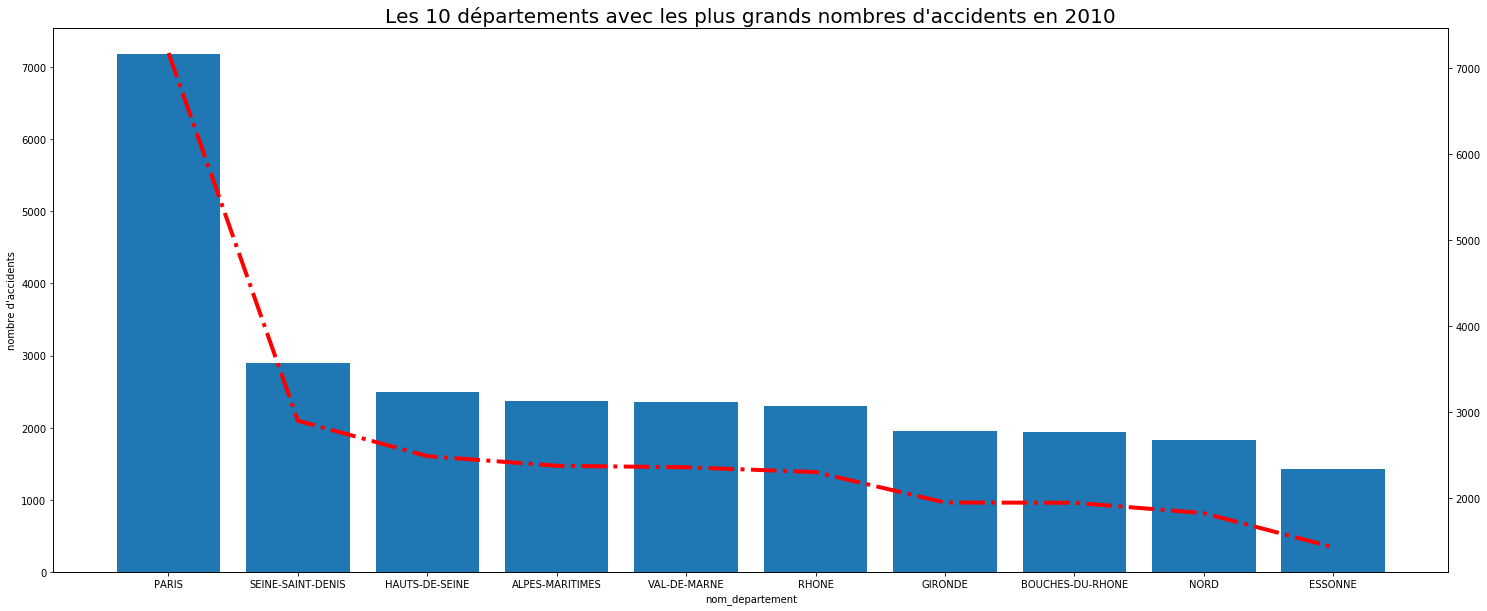

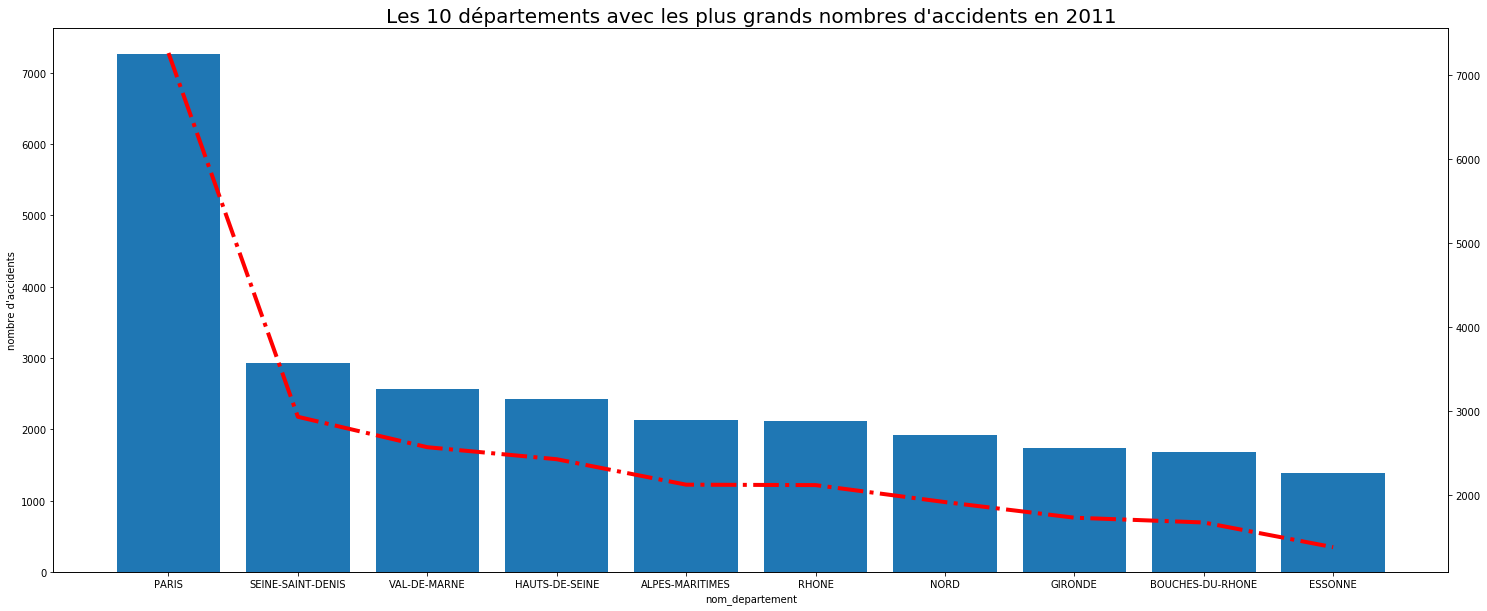

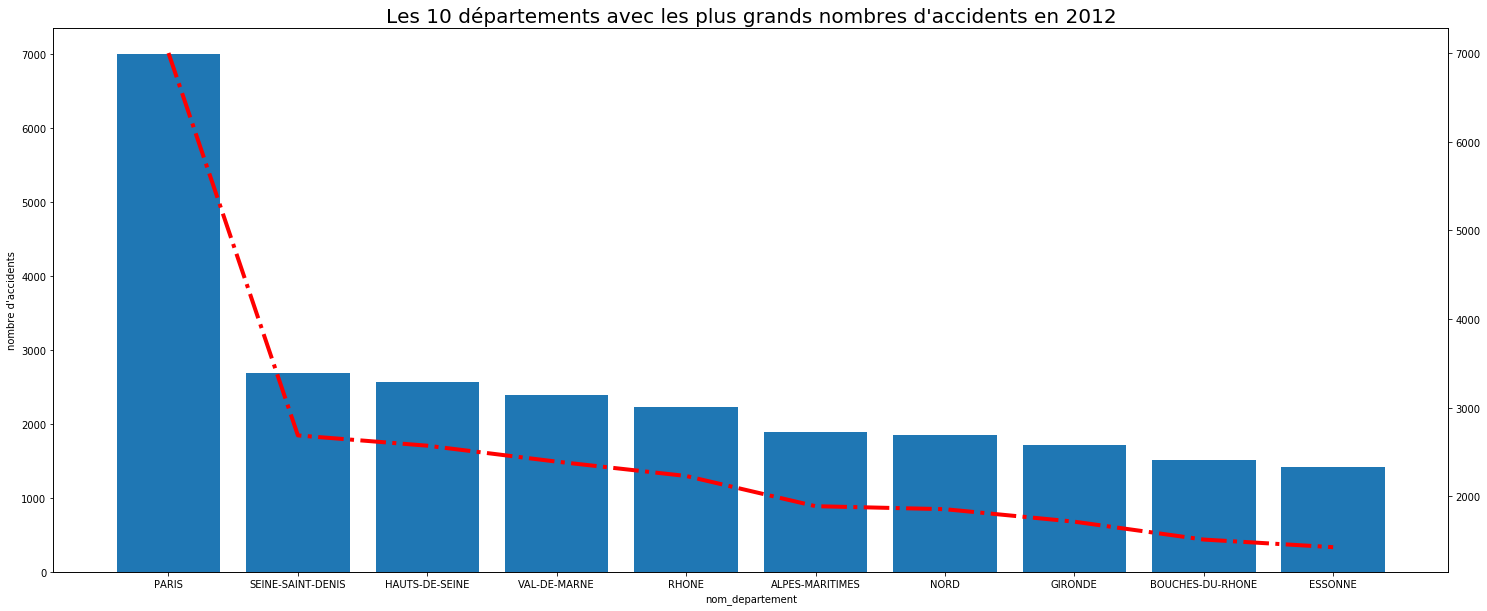

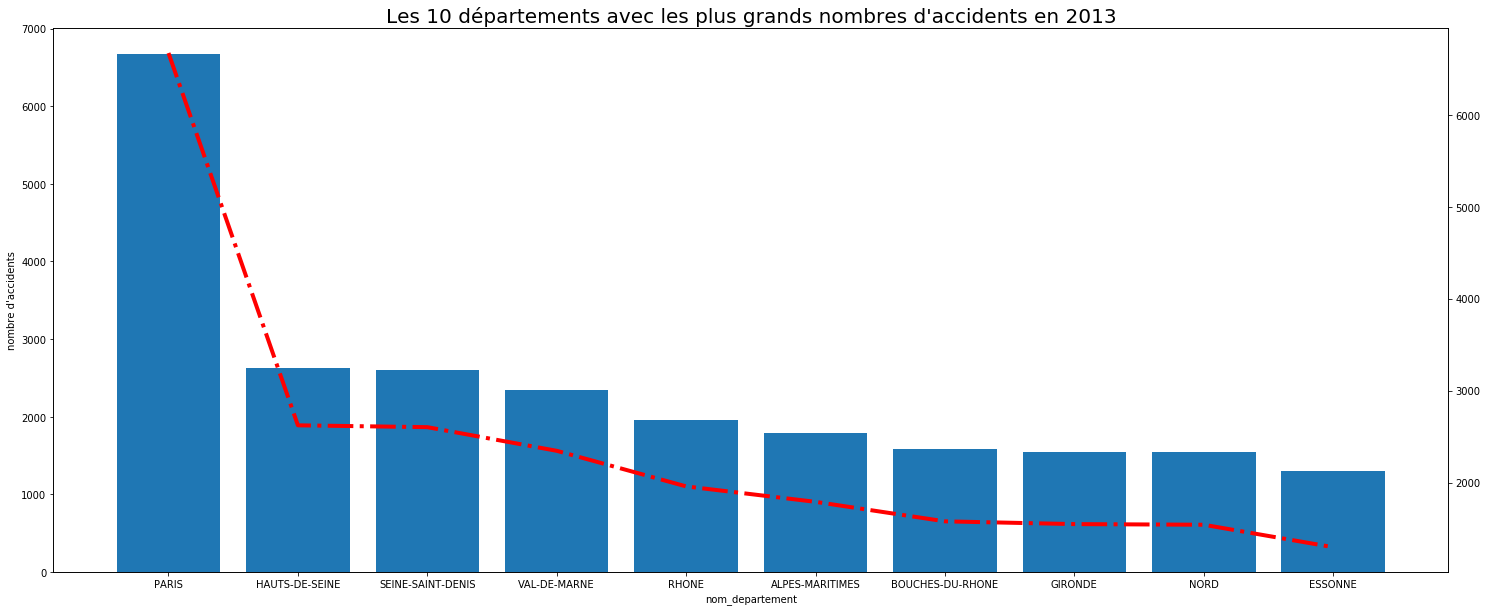

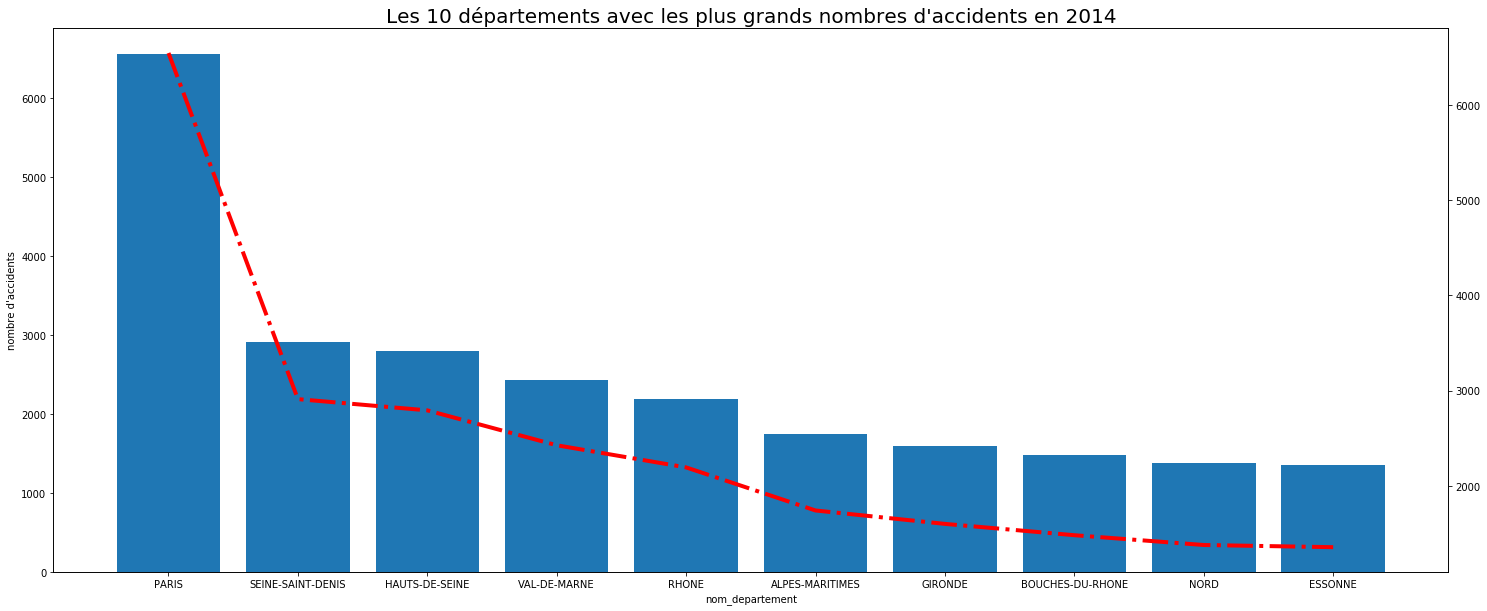

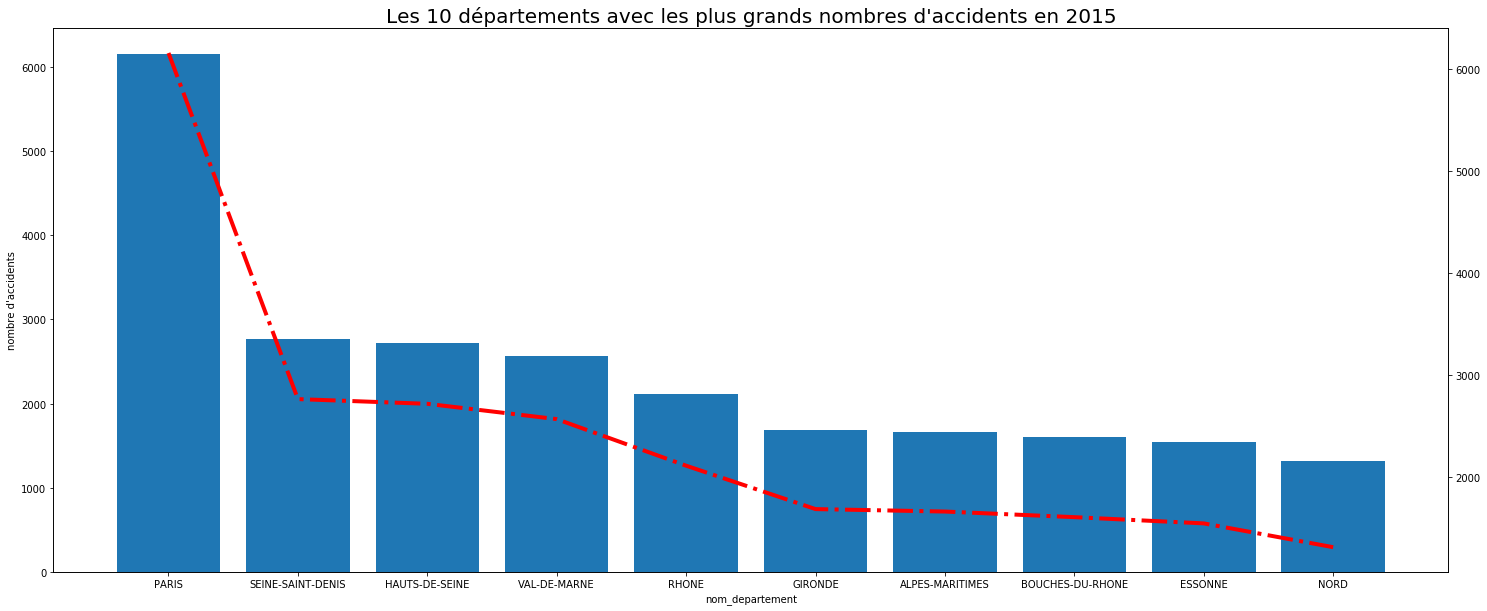

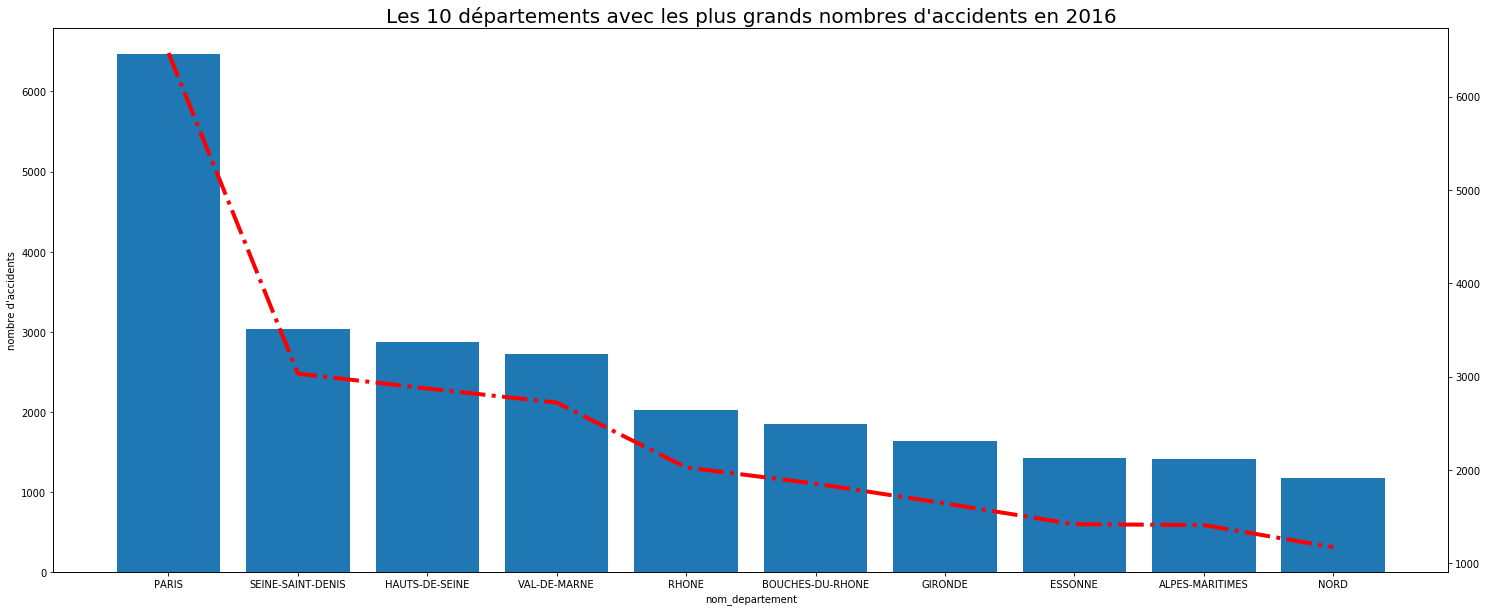

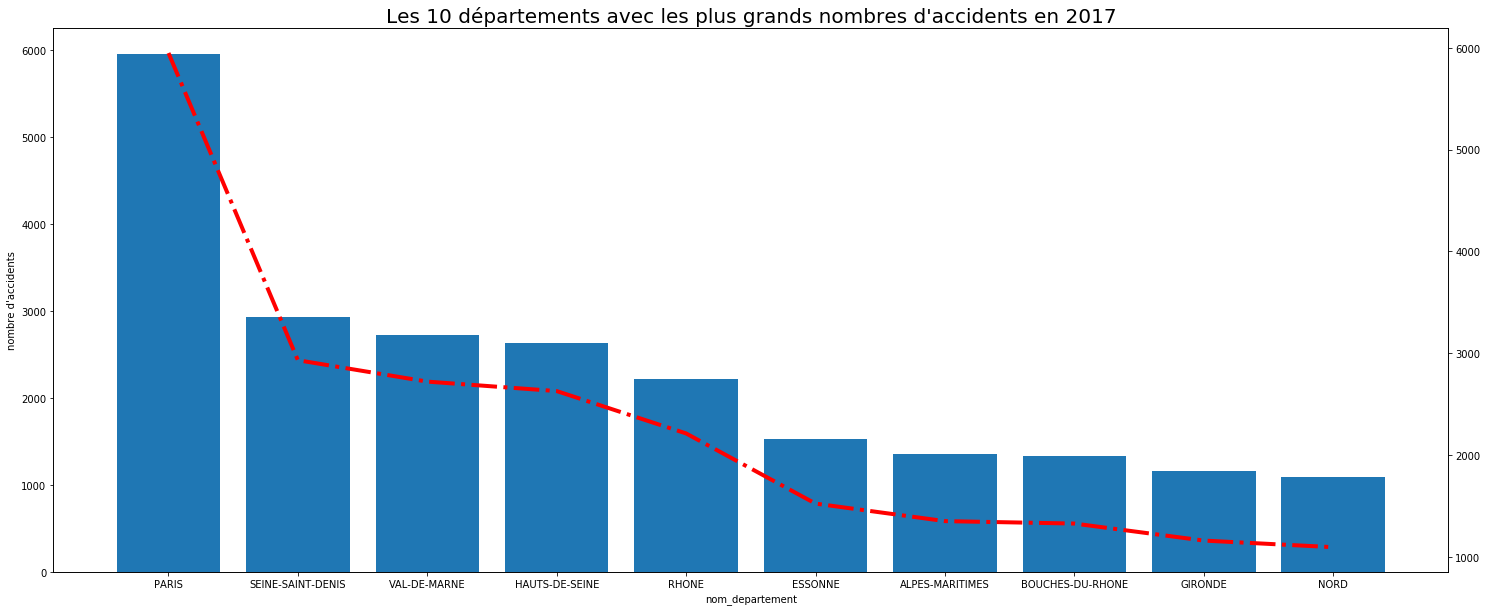

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.get_backend()
%matplotlib inline
i = 0
for carac in carac_join:
    plt.figure(figsize=[25,10])
    plt.ylabel("nombre d'accidents")
    plt.bar(x=carac.groupby(by="nom_departement").size().sort_values(ascending=False).keys().tolist()[0:10],
            height=carac.groupby(by="nom_departement").size().sort_values(ascending=False).tolist()[0:10])
    carac.groupby(by="nom_departement").size().sort_values(ascending=False)[0:10].plot(secondary_y=True, color='r', linewidth=4, linestyle="-.")
    plt.title("Les 10 départements avec les plus grands nombres d'accidents en " + str(2010 + i), fontsize=20)
    i = i + 1

On remarque d'après ces visualisations, que cette liste ne change que d'ordre d'une année à une autre, encore, on remarque un motif (pattern) qui est présent dans toutes les visualisations obtenues, dans la droite reliant les hauteurs des départements. Ces deux remarques nous affirment que le département est un des grands facteurs affectant le nombre de sinistres automobiles enregistrées chaque année.
<br><br><center><img src="communes.png"></center><br><br>
Le problème ainsi réside dans la nature de l'information saisie d'après ces 'patterns' trouvés. La 1ère possibilité est que cet ordre n'est qu'un indicateur qualitatif du nombre de communes pour ces départements. Par exemple, si le département de Paris comporte plus de communes que les autres départements avec une grande différence, c'est normal donc de le trouver en tête de la liste obtenue après l'avoir ordonner. Par contre, si on trouve que les communes du département de Paris couvre toute la liste obtenue (ou du moins sa majorité), on peut donc affirmer l'utilité de cette information extraite qui consiste en la relation étroite entre le nombre d'accidents et le département correspondant.

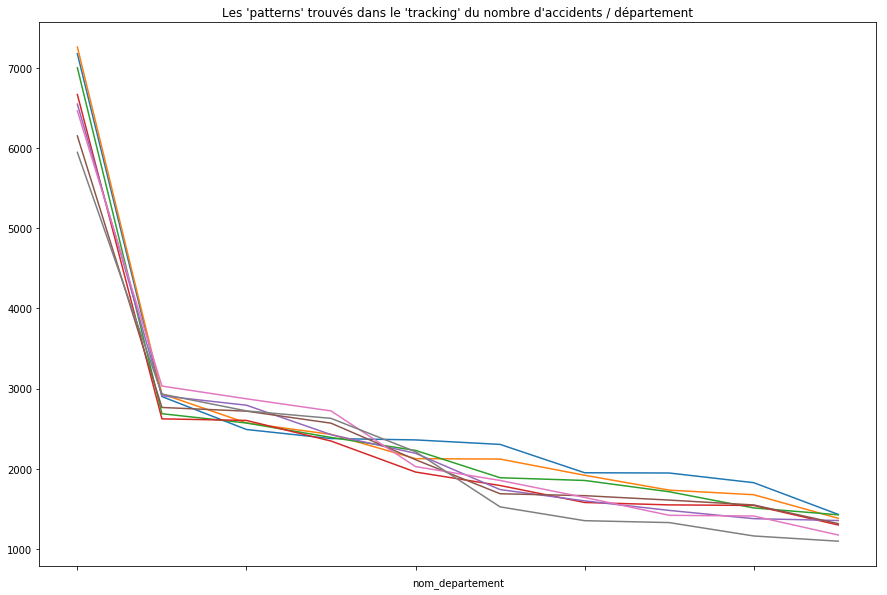

In [5]:
plt.figure(figsize=(15,10))
for carac in carac_join:
    carac.groupby(by="nom_departement").size().sort_values(ascending=False)[0:10].plot()
plt.title("Les 'patterns' trouvés dans le 'tracking' du nombre d'accidents / département");

In [6]:
list_top10carac = []
for carac in carac_join:
     list_top10carac.append(carac.groupby(by="nom_commune").size().sort_values(ascending=False).keys()[0:20])

[set(list_top10carac[0]) & set(list_top10carac[1]) & set(list_top10carac[2])
                & set(list_top10carac[3]) & set(list_top10carac[4]) & set(list_top10carac[5])
                & set(list_top10carac[6]) & set(list_top10carac[7])]

[{'NICE',
  'PARIS-11E-ARRONDISSEMENT',
  'PARIS-12E-ARRONDISSEMENT',
  'PARIS-13E-ARRONDISSEMENT',
  'PARIS-14E-ARRONDISSEMENT',
  'PARIS-15E-ARRONDISSEMENT',
  'PARIS-16E-ARRONDISSEMENT',
  'PARIS-17E-ARRONDISSEMENT',
  'PARIS-18E-ARRONDISSEMENT',
  'PARIS-19E-ARRONDISSEMENT',
  'PARIS-20E-ARRONDISSEMENT',
  'PARIS-8E-ARRONDISSEMENT',
  'RENNES',
  'SAINT-DENIS',
  'TOULOUSE'}]

Voilà donc que l'indépendance de l'apparition de notre motif et le hasard est confirmé: en intersectant les listes des 20 communes renvoyant les plus grands nombres d'accidents, on a trouvé 11 communes appartenant au département de Paris, ce qui a contribué à son classement en tête de liste. Y existe ainsi une grande association entre les départements/communes étudiés et le nombre d'accidents renvoyé.

Essayons donc la même technique avec les communes dans chaque département.

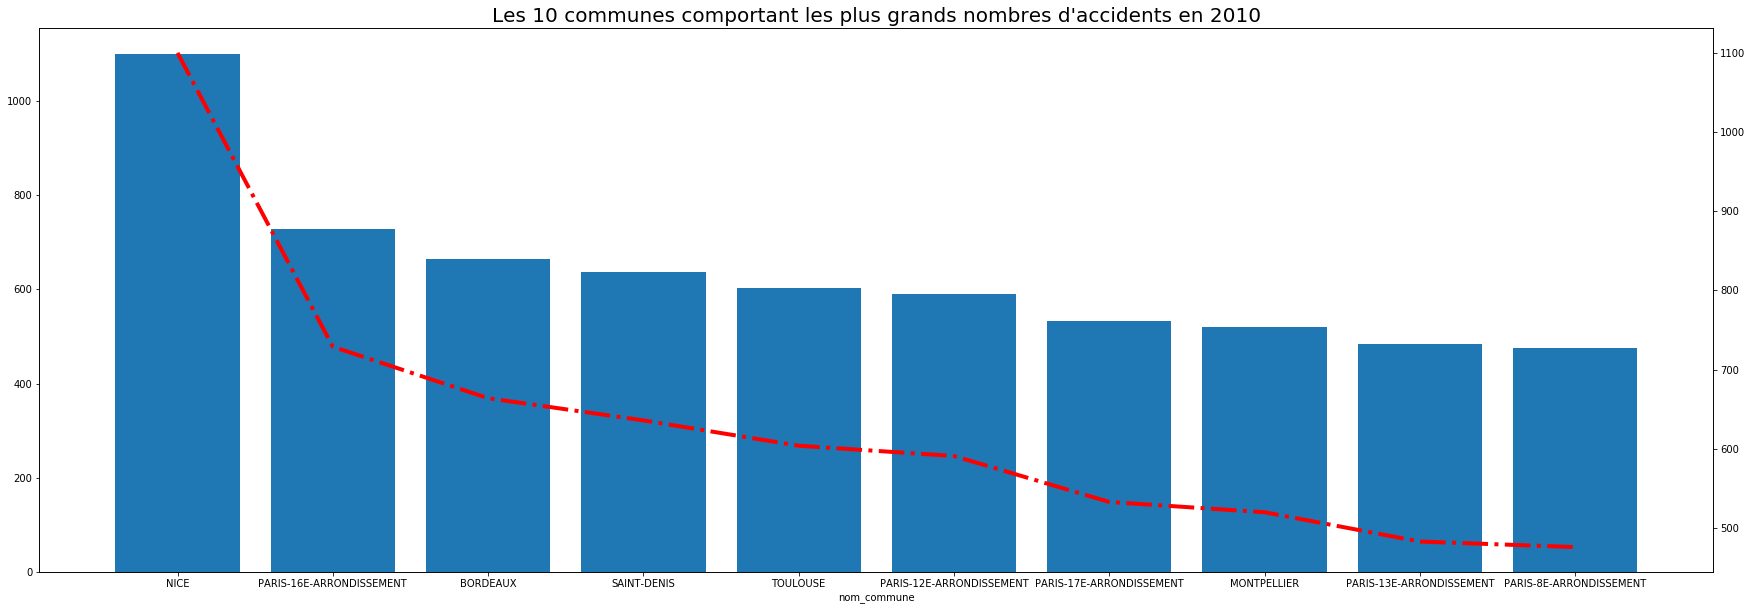

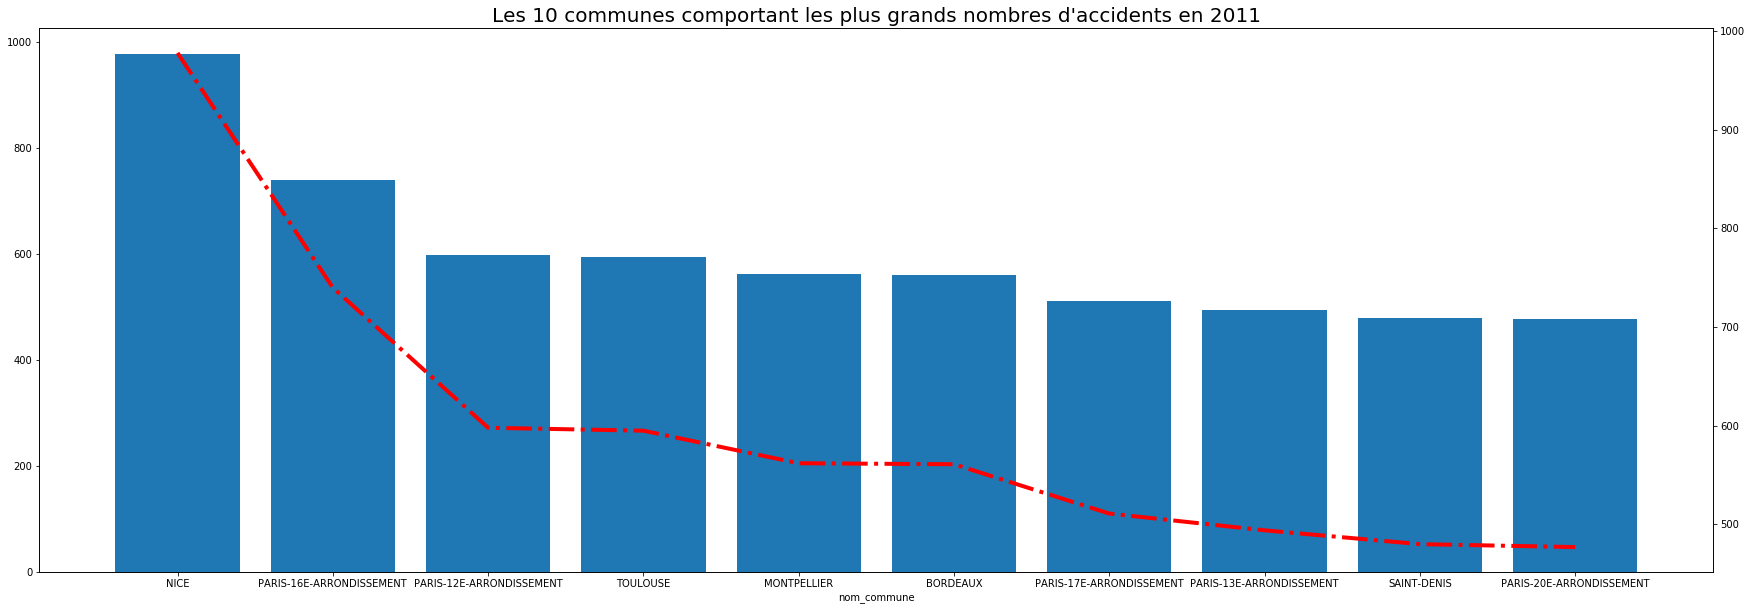

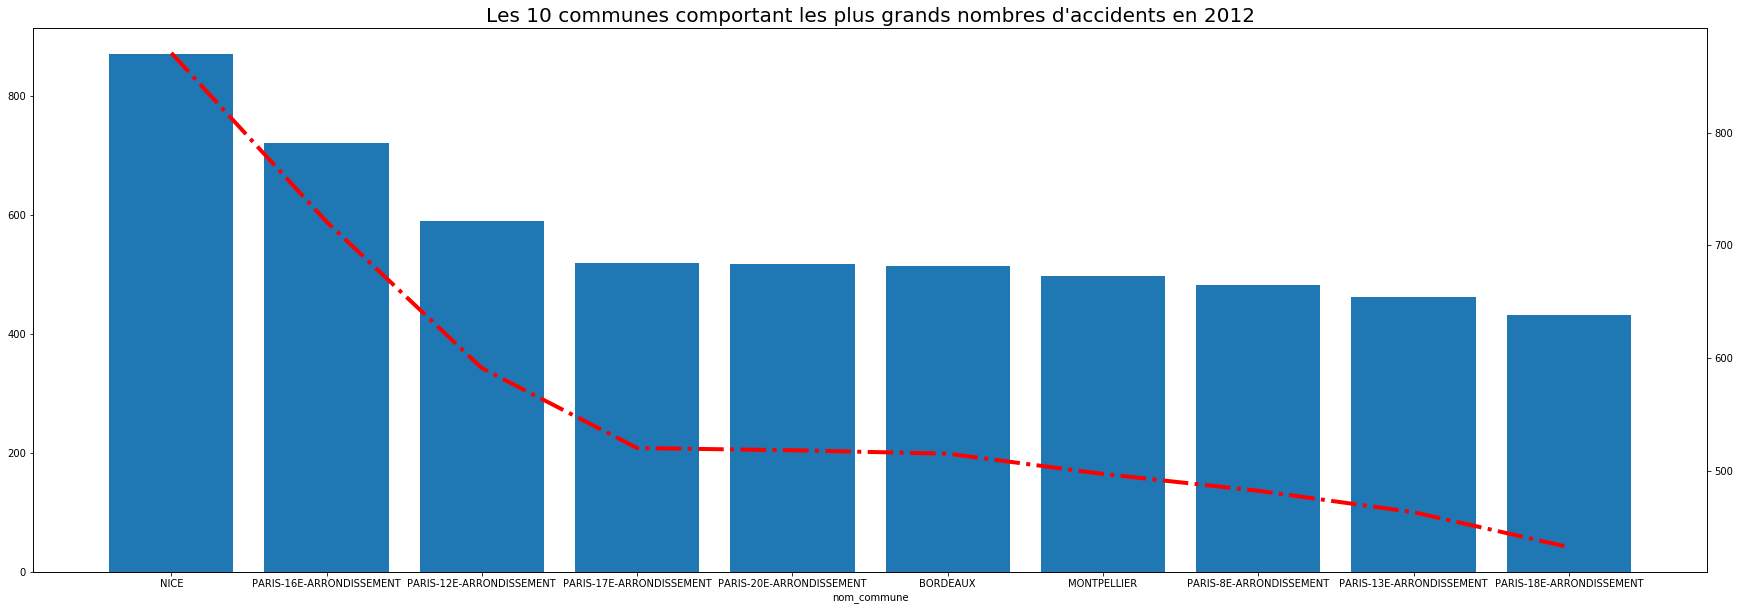

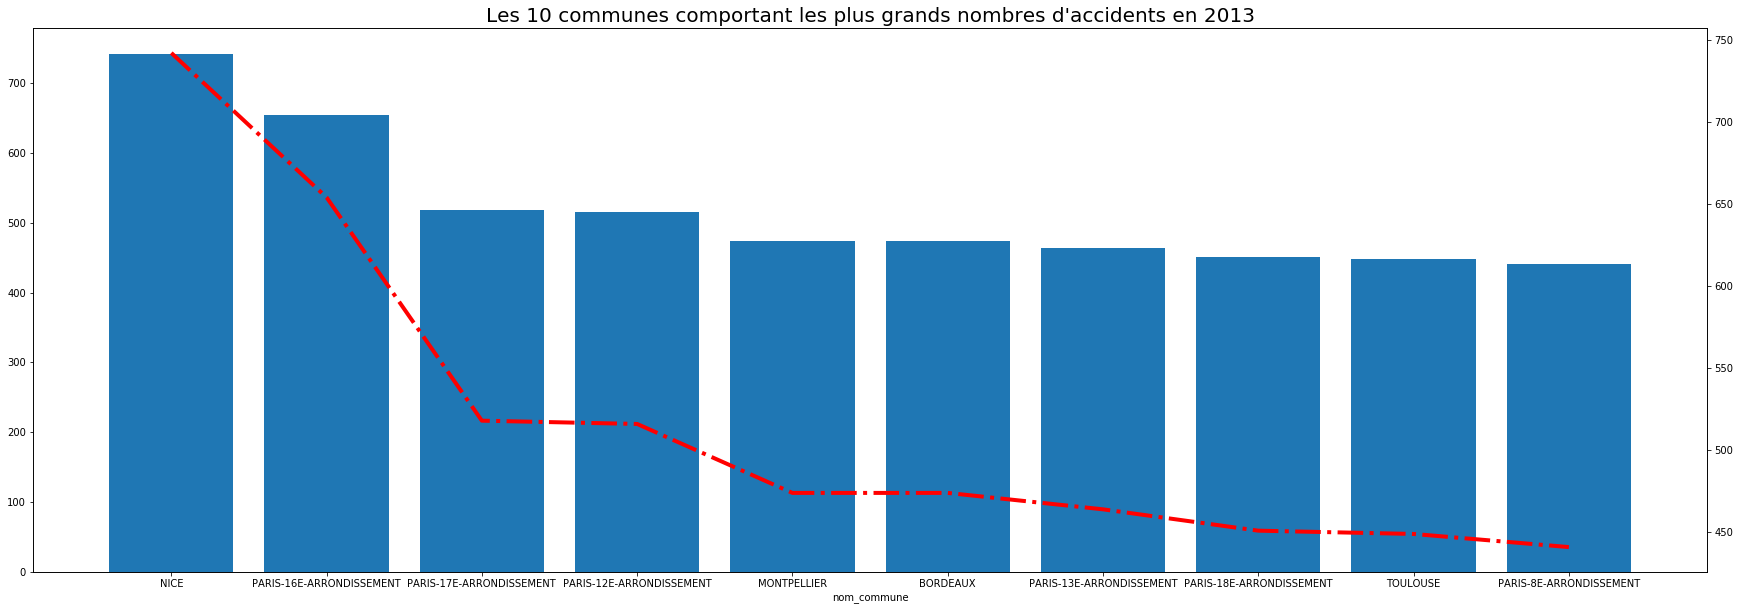

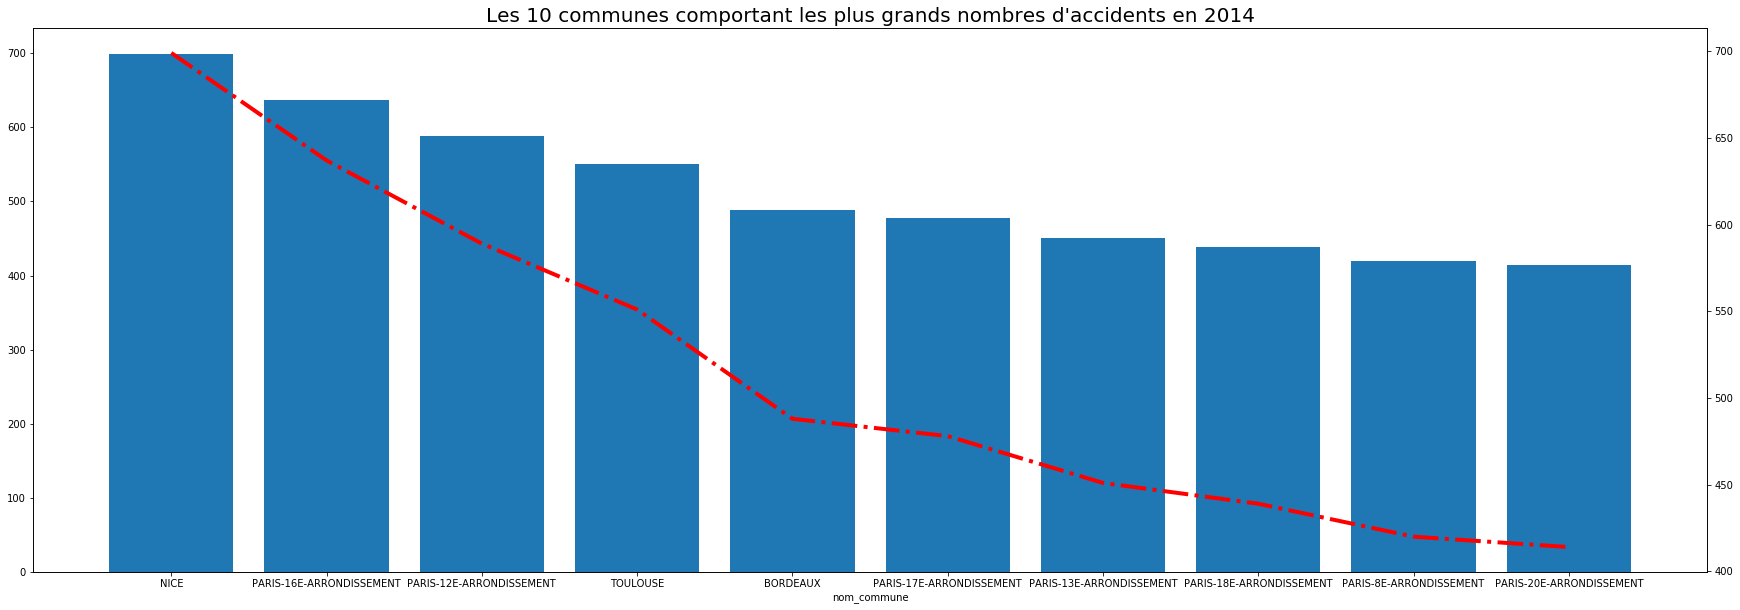

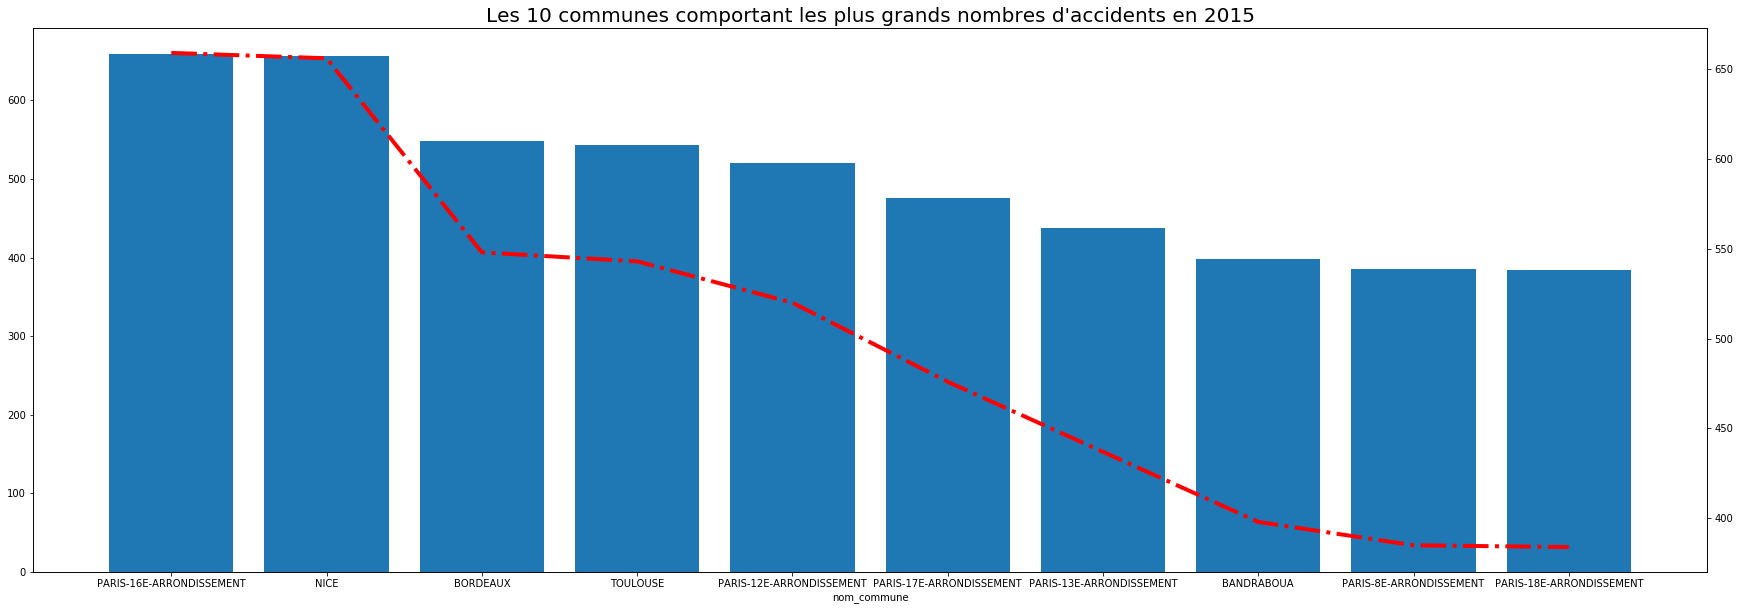

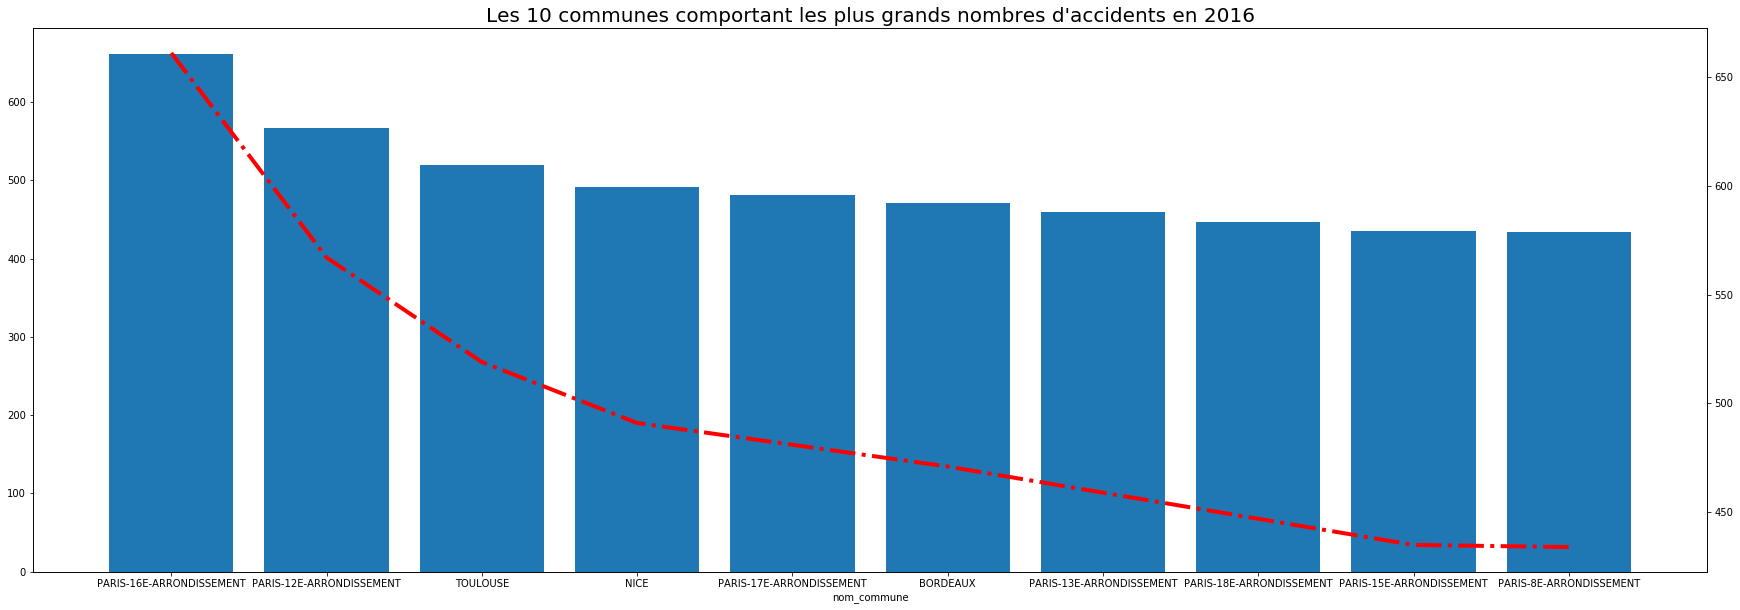

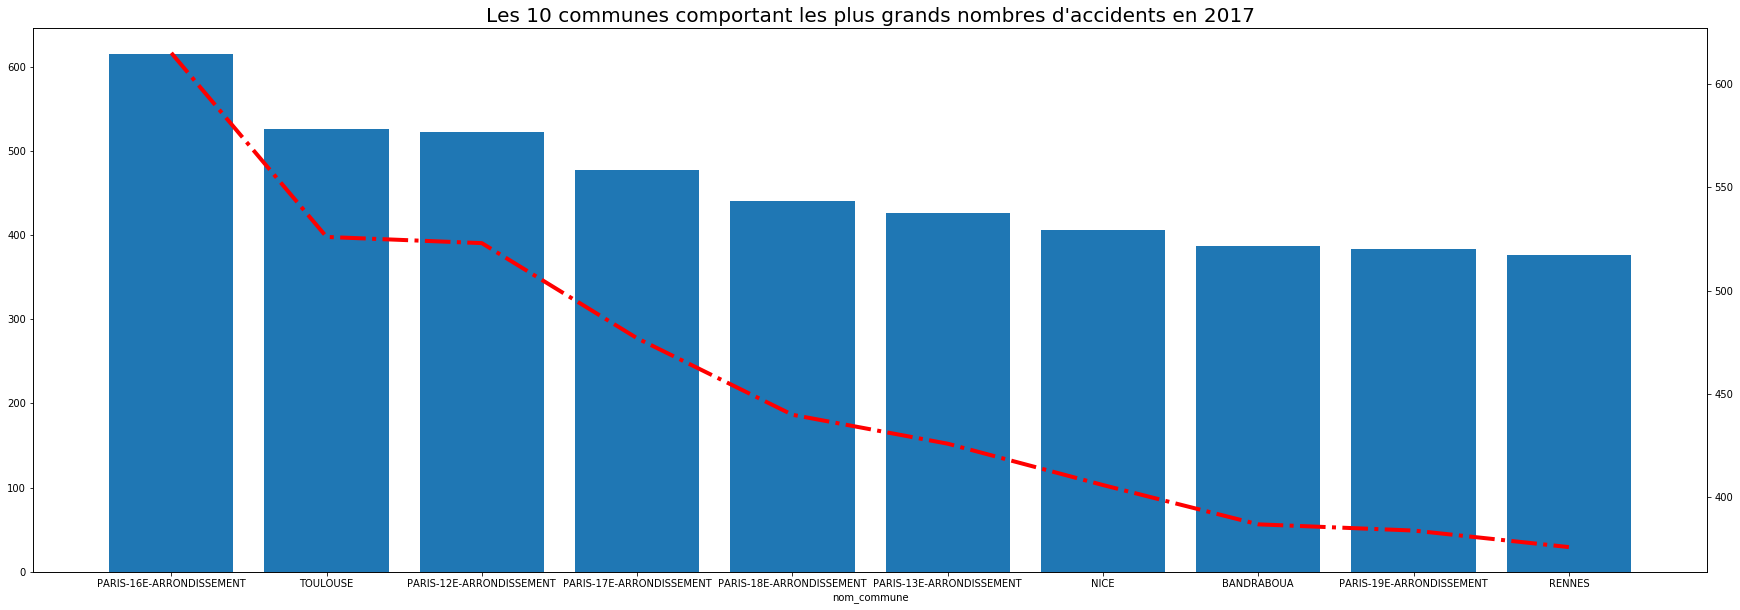

In [7]:
i = 0
for carac in carac_join:
    plt.figure(figsize=[30,10])
    plt.bar(x=carac.groupby(by="nom_commune").size().sort_values(ascending=False).keys().tolist()[0:10],
            height=carac.groupby(by="nom_commune").size().sort_values(ascending=False).tolist()[0:10])
    carac.groupby(by="nom_commune").size().sort_values(ascending=False)[0:10].plot(secondary_y=True, color='r', linestyle="-.", linewidth=4)
    plt.title("Les 10 communes comportant les plus grands nombres d'accidents en " + str(2010 + i), fontsize=20)
    i = i + 1

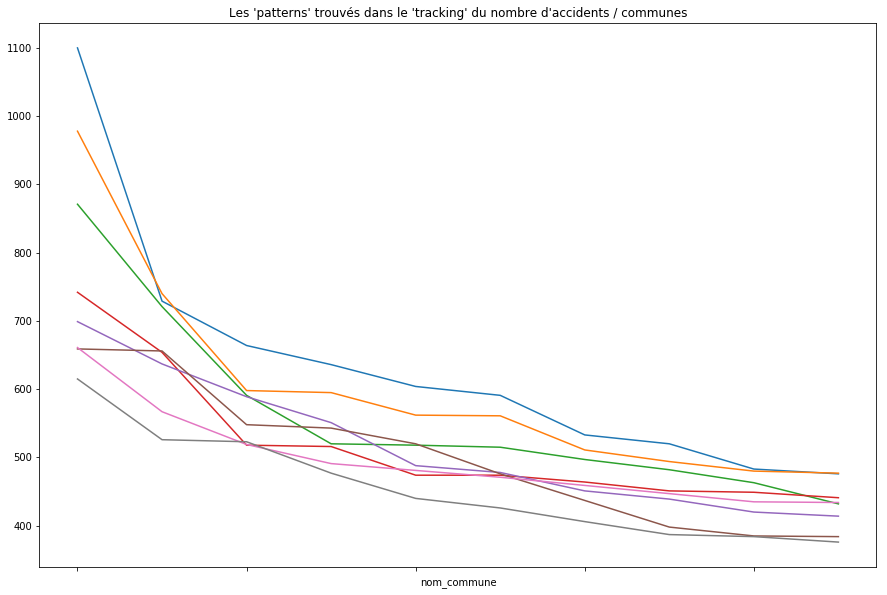

In [8]:
plt.figure(figsize=(15,10))
for carac in carac_join:
    carac.groupby(by="nom_commune").size().sort_values(ascending=False)[0:10].plot()
plt.title("Les 'patterns' trouvés dans le 'tracking' du nombre d'accidents / communes");

Ensuite, pensant des sinistres automobiles, on a tendance parfois de parler de l'état de la météo qui a contribué d'une grande part de l'accident, et ce n'est qu'un lien fourni par notre logique. Pour affirmer cette relation, on a essayé de visualiser l'état de la météo pour chaque accident dans nos données, pour chaque année à part, pour qu'on puisse comparer les années au cas où on remarque une sorte de motif dans les résultats.
<br><br>

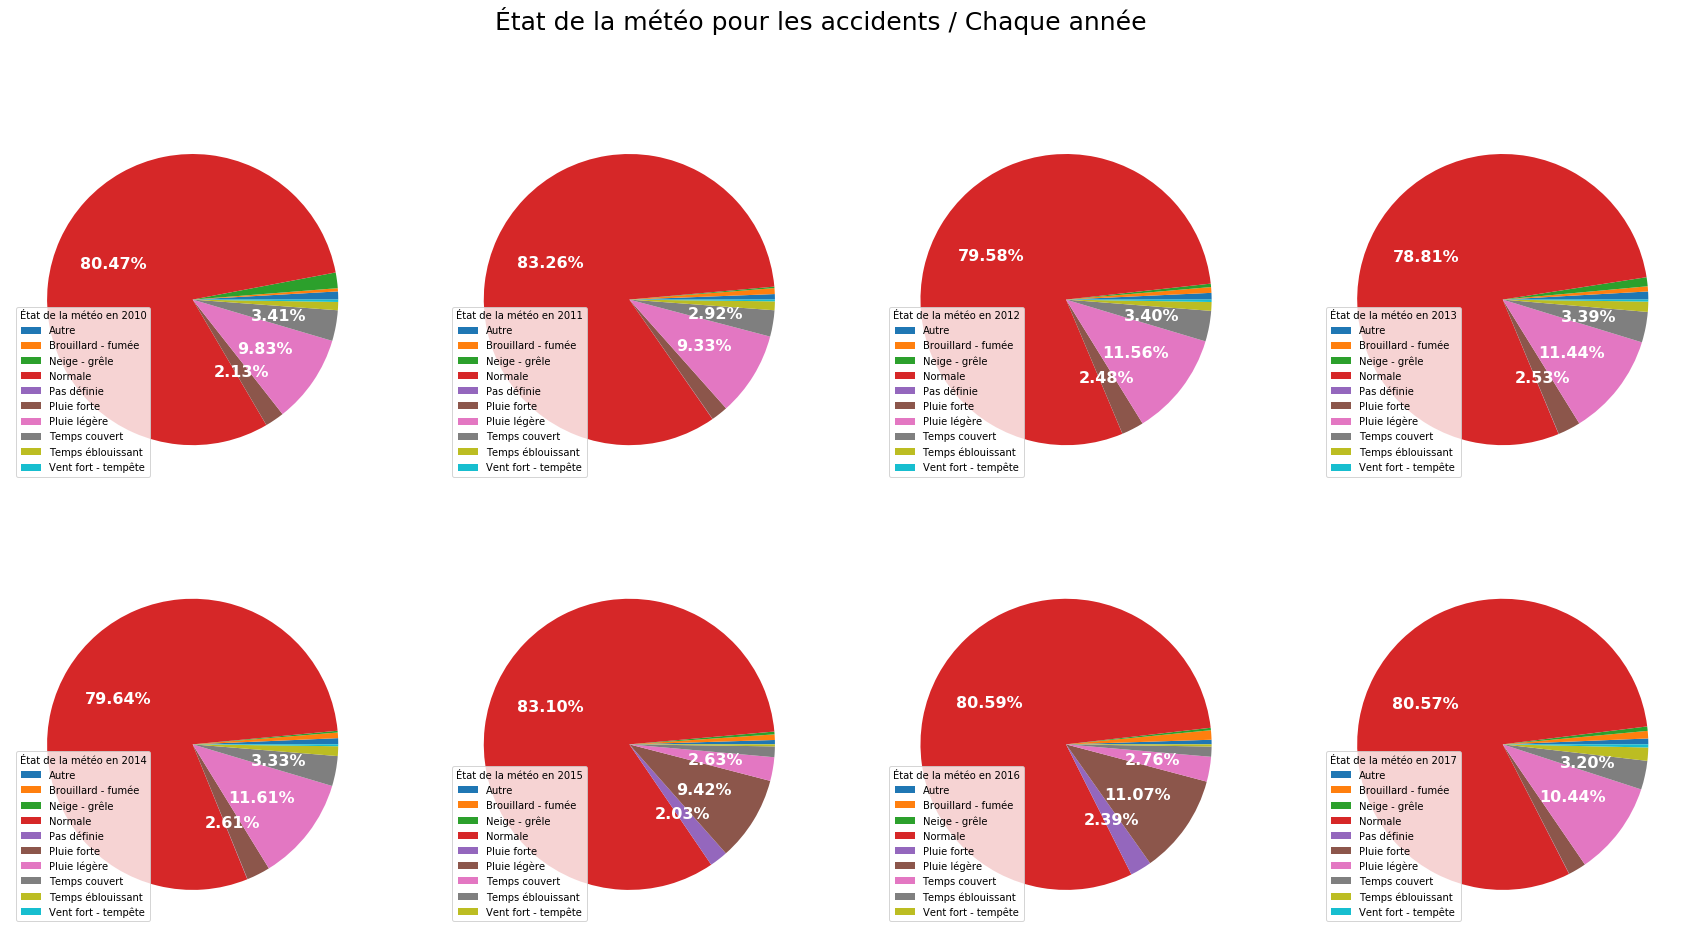

In [9]:
keys = []
vals = []
for carac in carac_list:
    keys.append(carac.groupby(by="meteo").size().keys().tolist())
    vals.append(carac.groupby(by="meteo").size().tolist())

def func(pct):
    return "{:.2f}%".format(pct) if pct > 2 else ''

fig, axs = plt.subplots(2, 4, figsize=(30,15), subplot_kw=dict(aspect="equal"))
fig.suptitle("État de la météo pour les accidents / Chaque année", fontsize=25)
for i in range(0,2):
    for j in range(0,4):        
        wedges, texts, autotexts = axs[i,j].pie(vals[i*4+j],
                                                autopct=lambda pct: func(pct),
                                                textprops=dict(color="w"))
        plt.setp(autotexts, size=16, weight="bold")
        axs[i,j].legend(wedges, keys[i*4+j],
                  title="État de la météo en " + str(2010 + i*4+j),
                  loc="lower left",
                  bbox_to_anchor=(0, 0, 0.5, 1))
plt.show();

<br><br>
Voilà donc qu'après cette visualisation, on peut en conclure que la plupart des accidents sont survenus dans des conditions météorologiques normales. Par contre, ce qu'on peut conclure de cette prédominance de la modalité "Normale", est l'augmentation de la prudence des conducteurs, et même les piétons (et autres intervenants dans les sinistres) durant le mauvais temps.

Prenons maintenant une vision descriptive du reste des données pour une meilleur compréhension du cas d'étude.
<br><br>

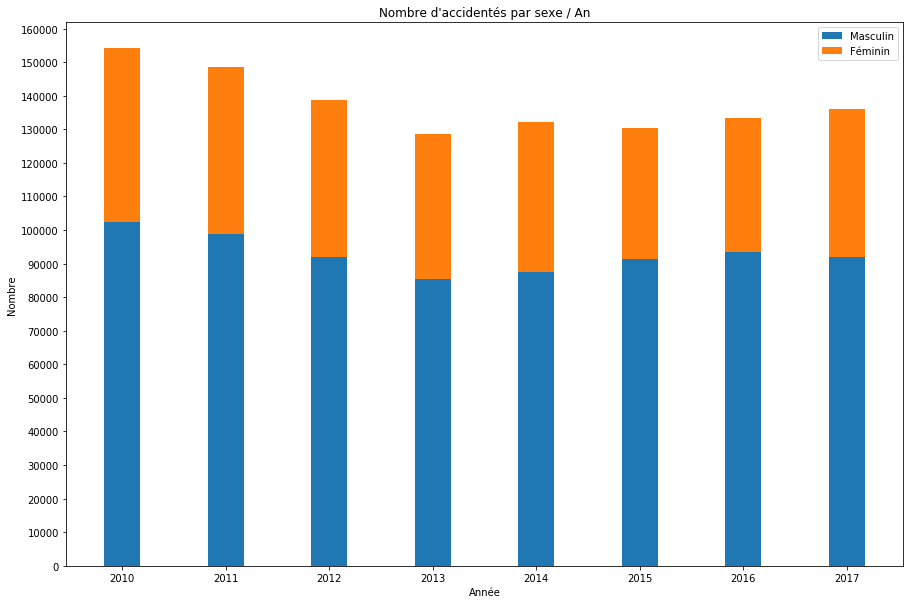

In [10]:
men_vals = []
women_vals = []
for usagers in usagers_list:
    men_vals.append(usagers.groupby(by="sexe").size()['Masculin'])
    women_vals.append(usagers.groupby(by="sexe").size()['Féminin'])

N = 8
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(15,10))
p1 = plt.bar(ind, men_vals, width)
p2 = plt.bar(ind, women_vals, width, bottom=men_vals)

plt.ylabel('Nombre')
plt.xlabel('Année')
plt.title("Nombre d'accidentés par sexe / An")
plt.xticks(ind, ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
plt.yticks(np.arange(0, 161000, 10000))
plt.legend((p1[0], p2[0]), ('Masculin', 'Féminin'))

plt.show()

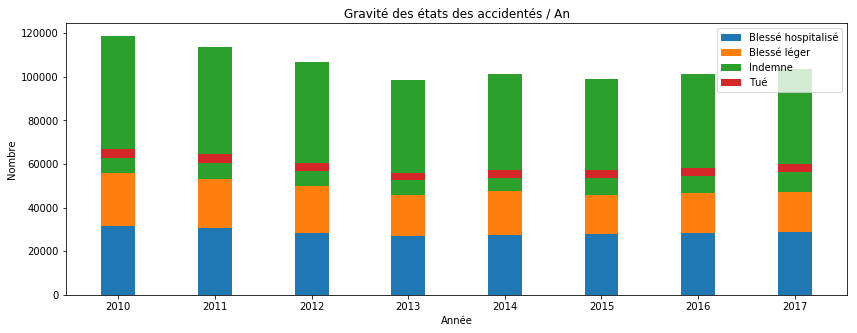

In [11]:
blessehosp_vals = []
blesselegr_vals = []
indemne_vals = []
tue_vals = []
for usagers in usagers_list:
    blessehosp_vals.append(usagers.groupby(by="gravite_etat").size()['Blessé hospitalisé'])
    blesselegr_vals.append(usagers.groupby(by="gravite_etat").size()['Blessé léger'])
    indemne_vals.append(usagers.groupby(by="gravite_etat").size()['Indemne'])
    tue_vals.append(usagers.groupby(by="gravite_etat").size()['Tué'])

N = 8
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(14,5))
p1 = plt.bar(ind, blessehosp_vals, width)
p2 = plt.bar(ind, blesselegr_vals, width, bottom=blessehosp_vals)
p3 = plt.bar(ind, indemne_vals, width, bottom=blesselegr_vals)
p4 = plt.bar(ind, tue_vals, width, bottom=indemne_vals)

plt.ylabel('Nombre')
plt.xlabel('Année')
plt.title("Gravité des états des accidentés / An")
plt.xticks(ind, ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'))
plt.yticks(np.arange(0, 121000, 20000))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ("Blessé hospitalisé", "Blessé léger", "Indemne", "Tué"))

plt.show();

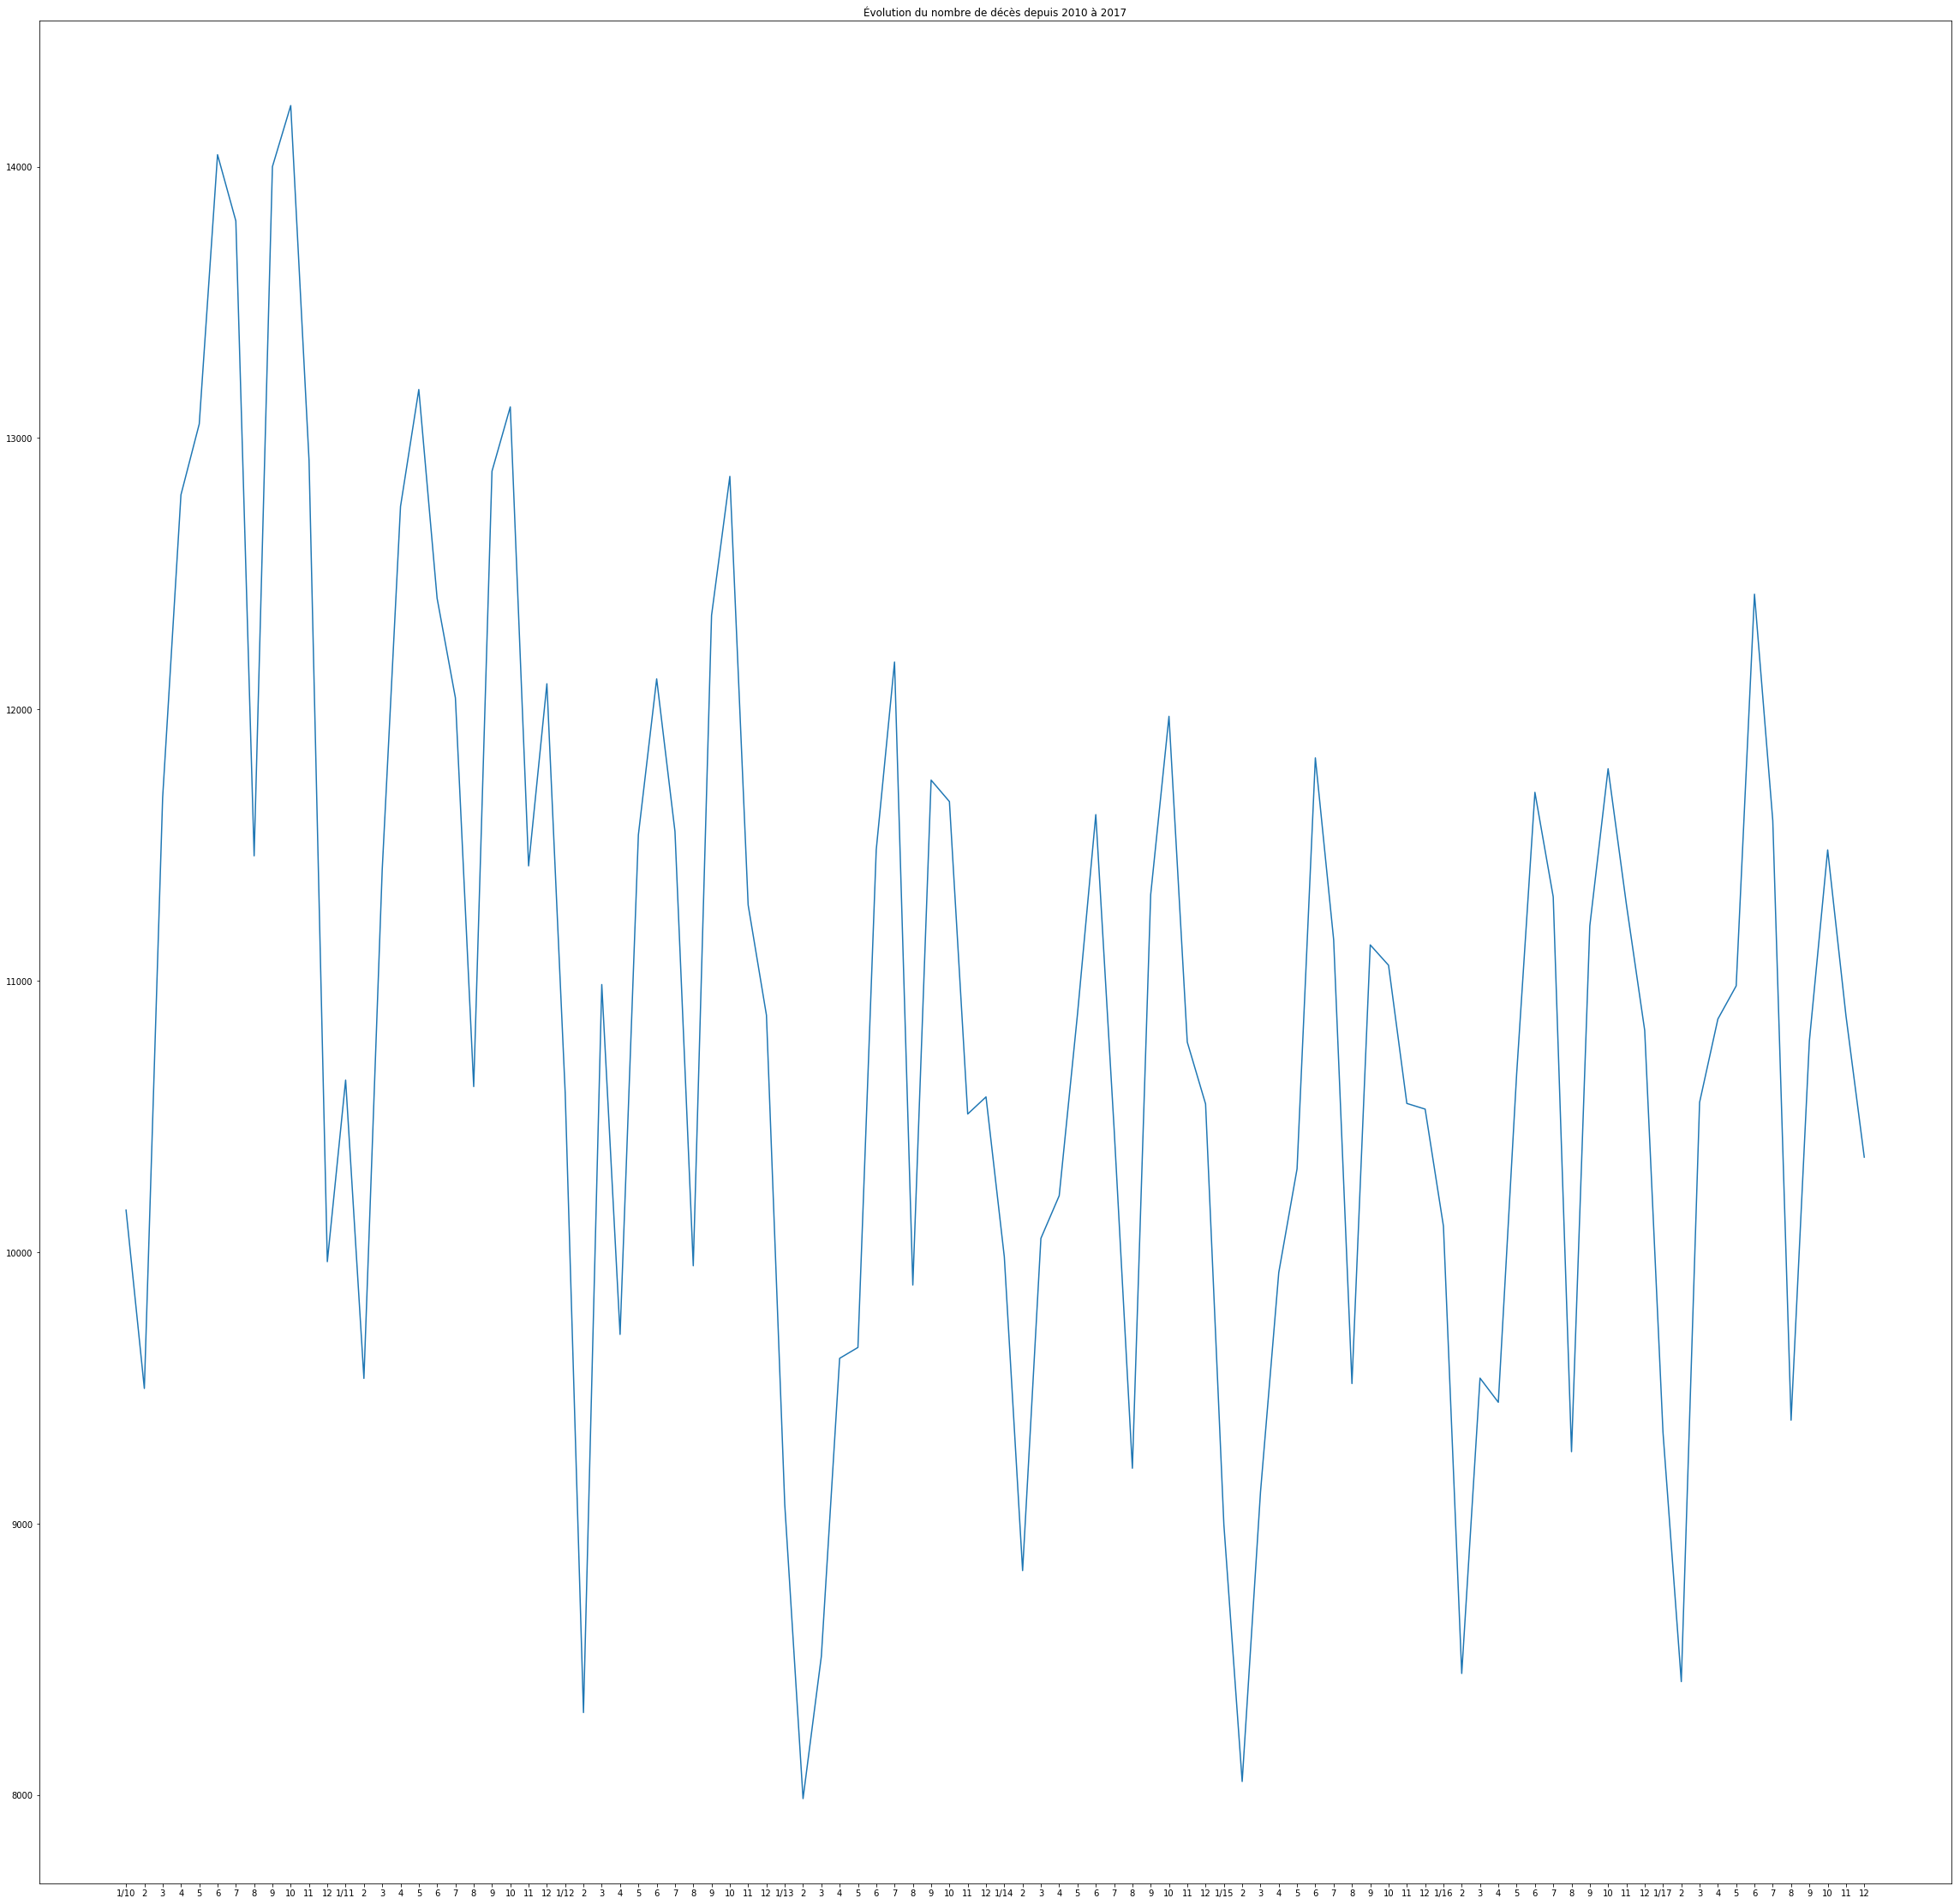

In [366]:
tue_vals = []
for fin in final_join:
    tue_vals.extend(fin.groupby(by="mois").size().reindex(['1', '2', '3', '4', '5', '6',
                                                           '7', '8', '9', '10', '11', '12']).tolist())

df = pd.Series( (v for v in tue_vals) )
plt.figure(figsize=(40,40))
df.plot()
plt.title("Évolution du nombre de décès depuis 2010 à 2017")
N = 96
ind = np.arange(N)    # the x locations for the groups
plt.xticks(ind, ('1/10','2','3','4','5','6',
                 '7','8','9','10','11','12',
                 '1/11','2','3','4','5','6',
                 '7','8','9','10','11','12',
                 '1/12','2','3','4','5','6',
                 '7','8','9','10','11','12',
                 '1/13','2','3','4','5','6',
                 '7','8','9','10','11','12',
                 '1/14','2','3','4','5','6',
                 '7','8','9','10','11','12',
                 '1/15','2','3','4','5','6',
                 '7','8','9','10','11','12',
                 '1/16','2','3','4','5','6',
                 '7','8','9','10','11','12',
                 '1/17','2','3','4','5','6',
                 '7','8','9','10','11','12'));

<br><h2>Modélisation et évaluation de l'information extraite</h2><br>
Après avoir attaqué la visualisation et l'analyse des données dont on dispose, on passe à la modélisation, biensûr sans arrêter le "feature engineering" pour une extraction de toute information utile à notre étude. Commencons donc par appliquer quelques tests statistiques pour mieux évaluer notre population et nos échantillons dans les bases de données fournies.
<br>

In [378]:
classification_join = final_join[0]
for i in range(1,8):
    classification_join = classification_join.append(final_join[i], ignore_index=True)

classification_join.heure_min = classification_join.heure_min.apply(lambda x : int(x[0:2]) * 60 + int(x[3:5]))
classification_join.drop(columns=['num_acc', 'an', 'num_veh'], axis=1, inplace=True)
categorical_data = classification_join.drop(columns=['largeur_tpc',
                                                     'largeur_route', 'nom_departement', 'nom_commune',
                                                     'mois', 'jour', 'heure_min', 'numero_route',
                                                     'nbre_voies', 'an_nais', 'proximite_ecole', 'insee'], axis=1)
classification_join = classification_join[['largeur_tpc', 'largeur_route', 'mois', 'jour', 'heure_min',
                                           'numero_route', 'nbre_voies', 'an_nais', 'proximite_ecole', 'insee']]
import re
def switch_base_ifneeded(x):
    try:
        return int(str(x))
    except:
        return int(re.compile('[^A-Z0-9]').sub('', str(x).upper()), 36)

for colum in classification_join.columns.values.tolist():
    classification_join[colum] = classification_join[colum].apply(lambda x : switch_base_ifneeded(x))

for column in categorical_data.columns.values.tolist():
    classification_join = pd.concat([classification_join,
                                     pd.get_dummies(categorical_data[column]).drop(['Pas définie'],
                                                                                   axis=1,
                                                                                  errors='ignore')], axis=1)

Après une nouvelle inspection des données en s'intéressant au typage et encodage pour la modélisation, il s'est avéré qu'on dispose de différents types de données incompatibles. Pour résoudre ce problème, on a essayé de recoder les données pour les normaliser et ainsi pouvoir procèder à la modélisation. Une des colonnes où se manifeste ce problème, la colonne 'numero_route' qui nous renseigne sur la référence ou le numéro de la route dans cette commune; un identifiant dont on se serve pour caractériser une route unique sur la carte routière francaise.
<center><img src="numero_route.jpg"></center>
Notre problème avec cette colonne est qu'elle présente des identifiants composées en caractères alphanumériques hormis d'autres symboles non-alphanumériques comme le '.' ou le simple espace '&nbsp;&nbsp;'.
C'est pourquoi qu'on a eu recours à la base numérique 36 (26 caractères alphabétiques + 10 caractères numériques) avec l'élimination des caractères spéciaux (après vérification de la non-induction de duplications dans les données). On a ainsi obtenu, après le 'dummy coding', des nouveaux identifiants numériques (seulement) pour la caractérisation cartographique des routes.

<small><i>NB* On a supprimé les colonnes concernant les modalités 'Pas définie' pour toute variable catégorique, vu qu'on peut déduire sa valeur par élimination en n'utilisant que les autres modalités disponibles.</i></small>
<br><br>

In [14]:
classification_join.head(10)

,largeur_tpc,largeur_route,mois,jour,heure_min,numero_route,nbre_voies,an_nais,proximite_ecole,insee,...,Sur refuge ou BAU,Sur trottoir,Autre,Avec animal,Jouant - courant,Masqué,Sens inverse du véhicule,Sens véhicule heurtant,Traversant,non renseigné ou sans objet
0,0,60,6,12,1170,39,2,1976,0,59052,...,0,0,0,0,0,0,0,0,0,1
1,0,0,10,25,735,239,1,1990,99,59052,...,0,0,0,0,0,0,0,0,0,1
2,0,0,10,25,735,239,1,1959,99,59052,...,0,0,0,0,0,0,0,0,0,1
3,0,0,8,7,600,39,0,1983,0,59477,...,0,0,0,0,0,0,0,0,0,1
4,0,0,8,7,600,39,0,1965,0,59477,...,0,0,0,0,0,0,0,0,1,0
5,0,68,9,22,990,39,2,1996,0,59477,...,0,0,0,0,0,0,0,0,0,1
6,0,68,9,22,990,39,2,1963,0,59477,...,0,0,0,0,0,0,0,0,0,1
7,0,61,9,11,960,41,2,1979,0,59011,...,0,0,0,0,0,0,0,0,0,1
8,0,61,9,11,960,41,2,1959,0,59011,...,0,0,0,0,0,0,0,0,0,1
9,0,61,9,11,960,41,2,1970,0,59011,...,0,0,0,0,0,0,0,0,0,1


In [15]:
classification_join.describe()

,largeur_tpc,largeur_route,mois,jour,heure_min,numero_route,nbre_voies,an_nais,proximite_ecole,insee,...,Sur refuge ou BAU,Sur trottoir,Autre,Avec animal,Jouant - courant,Masqué,Sens inverse du véhicule,Sens véhicule heurtant,Traversant,non renseigné ou sans objet
count,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,...,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06,1.045194e+06
mean,5.641176e+00,5.375683e+01,6.686027e+00,1.560310e+01,8.437741e+02,6.615781e+02,2.077889e+00,1.974724e+03,4.759931e+01,5.908081e+04,...,9.376250e-05,5.412392e-03,5.959659e-03,2.066602e-04,5.428657e-03,1.745131e-03,2.351717e-03,4.944537e-03,6.431151e-02,9.138964e-01
std,2.412411e+01,6.565795e+01,3.377152e+00,8.751258e+00,3.211605e+02,1.323934e+05,1.281865e+00,3.628539e+01,4.933174e+01,2.841631e+04,...,9.682654e-03,7.336964e-02,7.696848e-02,1.437420e-02,7.347920e-02,4.173831e-02,4.843747e-02,7.014337e-02,2.453071e-01,2.805172e-01
min,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.001000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,4.000000e+00,8.000000e+00,6.050000e+02,0.000000e+00,2.000000e+00,1.963000e+03,0.000000e+00,3.414300e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,0.000000e+00,5.500000e+01,7.000000e+00,1.600000e+01,9.000000e+02,0.000000e+00,2.000000e+00,1.978000e+03,3.000000e+00,6.714000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,0.000000e+00,7.600000e+01,1.000000e+01,2.300000e+01,1.090000e+03,7.500000e+01,2.000000e+00,1.990000e+03,9.900000e+01,8.306200e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,9.500000e+02,9.990000e+02,1.200000e+01,3.100000e+01,1.439000e+03,4.596682e+07,1.300000e+01,2.017000e+03,9.900000e+01,9.761700e+04,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


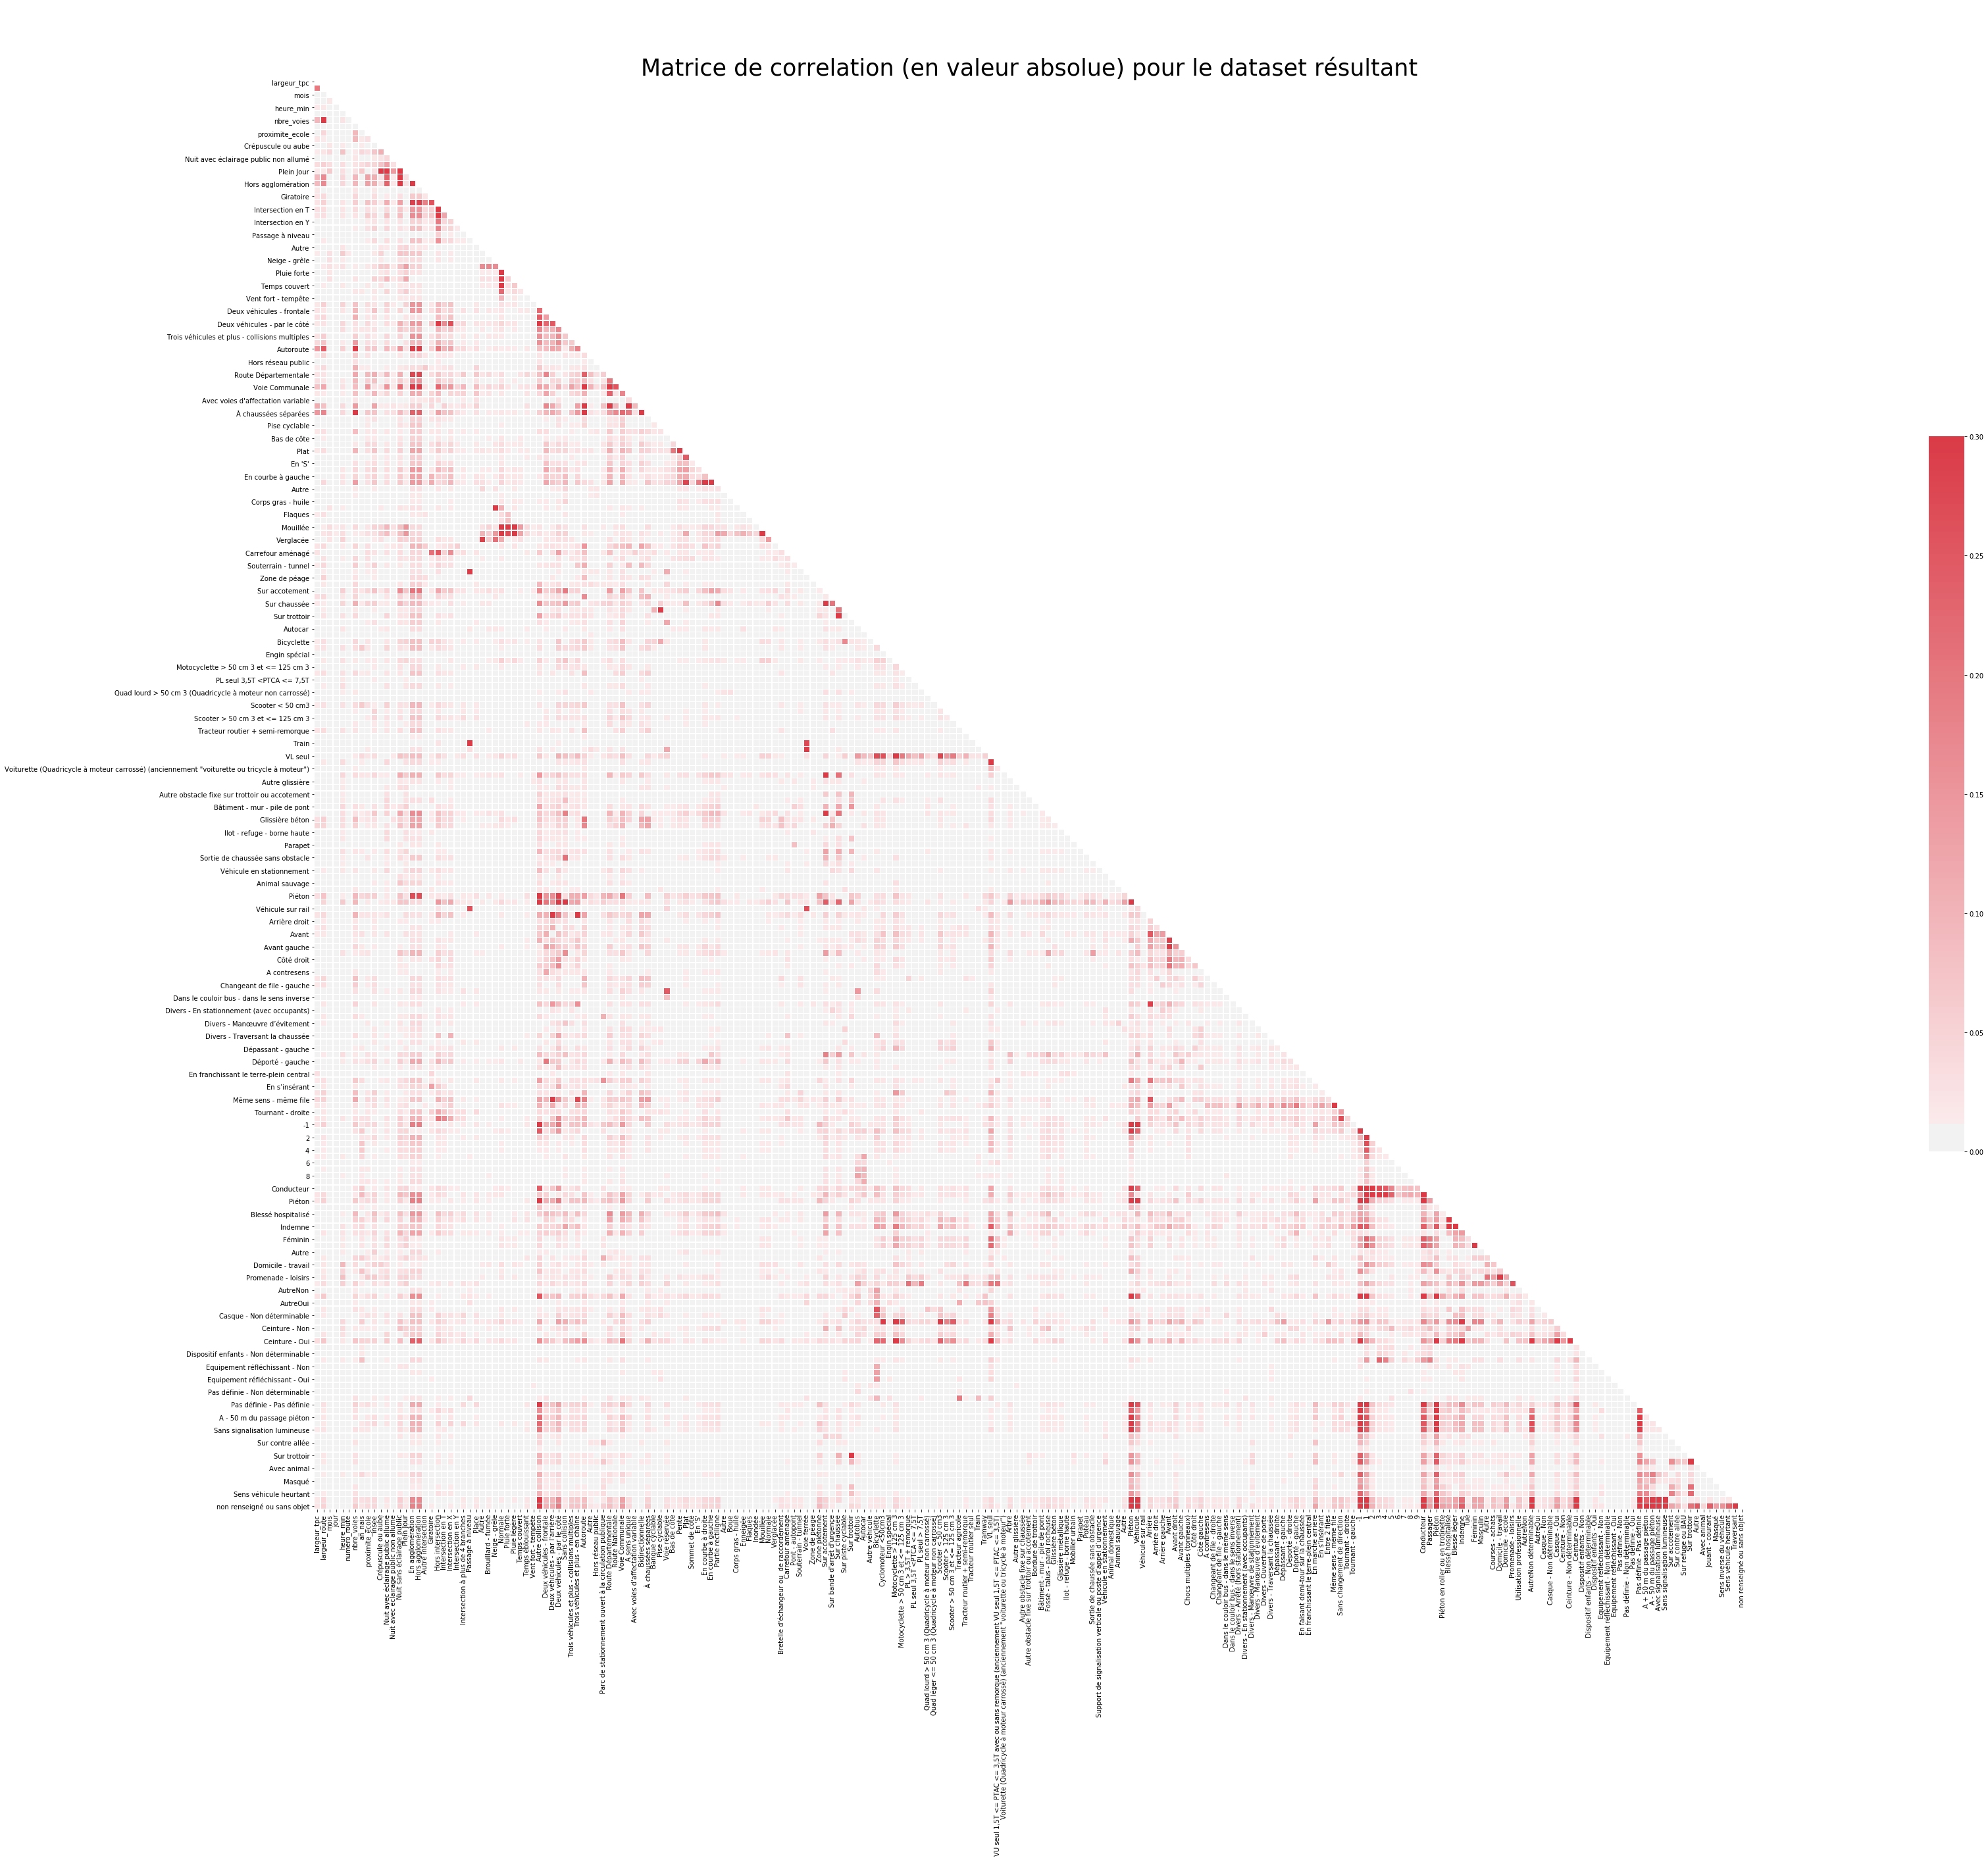

In [16]:
import seaborn as sns

# Compute the correlation matrix
corr = classification_join.corr().abs()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(100, 40))
plt.title("\n\nMatrice de correlation (en valeur absolue) pour le dataset résultant", fontsize=35)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<br><br>
En analysant cette visualisation de la matrice de corrélation, on peut observer que l'indice de corrélation (en valeur absolue) ne dépasse jamais la valeur 0,3; ce qui se dénonce insuffisant pour éliminer encore des colonnes ou pour considérer les variables qu'elles représentent corrélées. On remarque donc qu'on est arrivé à la fin de l'étape du "Feature Engineering". Notre dataset résultant porte autant d'information utile à notre modélisation et aux analyses effectuées, on peut donc s'attaquer à la modélisation. Le premier modèle qu'on essaiera de créer est un modèle de prédiction par classification du décès des accidentés. Notre dernier pas avant d'entammer la création de ce modèle, sera donc de lui choisir la bonne variable cible à estimer.

In [265]:
pd.DataFrame(classification_join.groupby("Tué").size(), columns=["Effectif sélectionné"])

,Effectif sélectionné
Tué,
0,1015948
1,29246


On peut remarquer notre position défavorable dans ce déséquilibre, en terme d'effectif pour chaque modalité de la variable cible. On essaiera donc de sélectionner une autre variable cible qui favorise l'équilibre du dataset, en plus de ca, ce qu'on essaiera de faire, est d'utiliser des algorithmes de bagging pour notre modélisation, pour qu'on évite les effets reliés à ce déséquilibre.

In [266]:
pd.DataFrame(classification_join.groupby("Indemne").size(), columns=["Effectif sélectionné"])

,Effectif sélectionné
Indemne,
0,617665
1,427529


Cette variable est donc celle qu'on choisira comme cible pour notre modélisation, vu que c'est la meilleur en terme de partitionnement de la population présente.

In [379]:
classification_join.drop(['Tué', 'Blessé hospitalisé', 'Blessé léger', 'Tournant - droite',
                          'Equipement réfléchissant - Oui', 'Pas définie - Non déterminable',
                          'Ceinture - Non', 'Casque - Non'], axis=1, errors='ignore', inplace=True)

# Labels are the values we want to predict
labels = np.array(classification_join['Indemne'])

# Remove the labels from the features
# axis 1 refers to the columns
features = classification_join.drop('Indemne', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,
                                                                            test_size = 0.25, random_state = 49)

print('Variables de training', train_features.shape)
print('Variable cible de training:', train_labels.shape)
print('Variable de test:', test_features.shape)
print('Variable cible de test:', test_labels.shape)

Variables de training (783895, 216)
Variable cible de training: (783895,)
Variable de test: (261299, 216)
Variable cible de test: (261299,)


In [334]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state=49)

# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(test_labels, predictions)*100))

# Feature Importances
feature_imp = pd.Series(rf.feature_importances_,index=feature_list).sort_values(ascending=False)

Accuracy: 79.00%


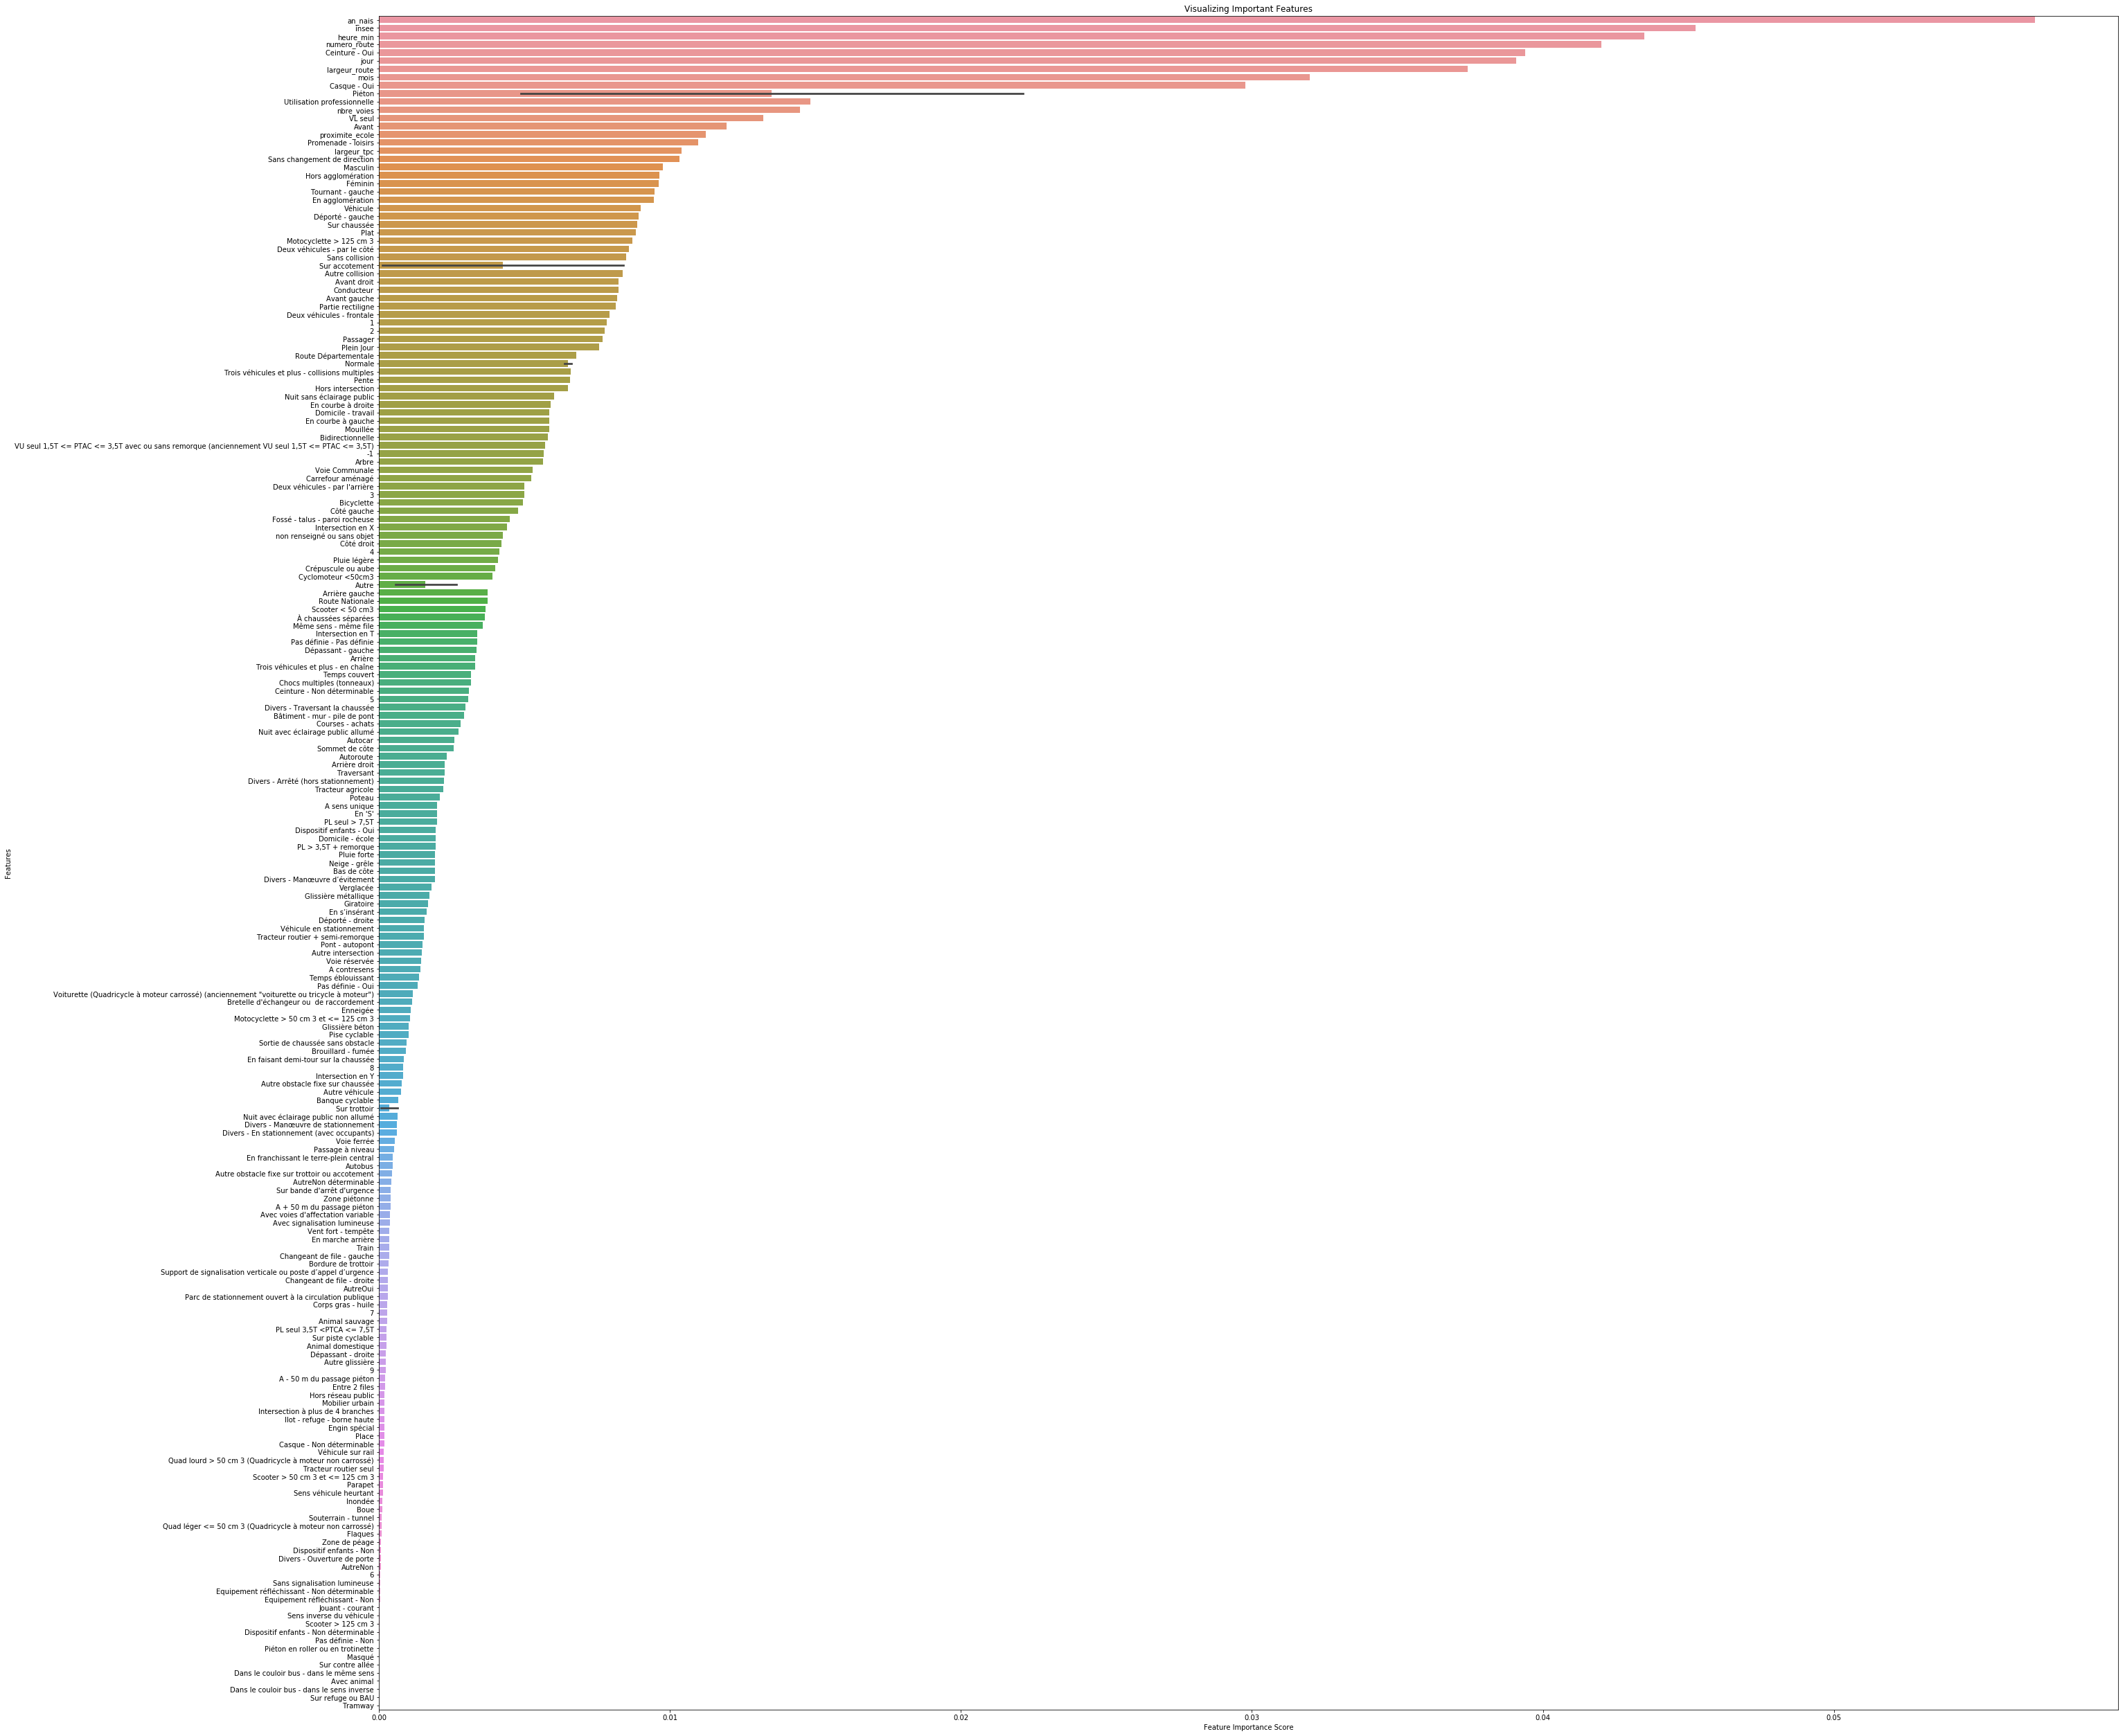

In [303]:
# Creating a bar plot
plt.figure(figsize=(45,45))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

Si on considère ce qu'a dégagé notre visualisation depuis notre modèle, on peut voir qu'il n'a pas vraiment tord, et que les liens, qu'il a effectué selon sa propre pondération d'importance, entre les variables et le résultat prédit sont tout à fait logiques. Pour prévoir si une personne accidentée est morte/indemne, il faut d'abord identifier son age (d'où la grande importance de l'année de naissance et la date), les conditions de la route (code_insee, num_route, nbre_voies, ..) et beaucoup d'autres facteurs (biensûr sans omettre celles qu'on peut pas identifier leurs liens logiques avec la mort de l'accidentée mais que notre modèle a marqué importantes).
Et pour se déclarer gagnants par notre feature engineering, ce qu'on a essayé de faire pour l'identification des variables 'code_insee' et 'num_route' a donné résultat, déjà elles font partie des variables les plus importantes par notre modèle.

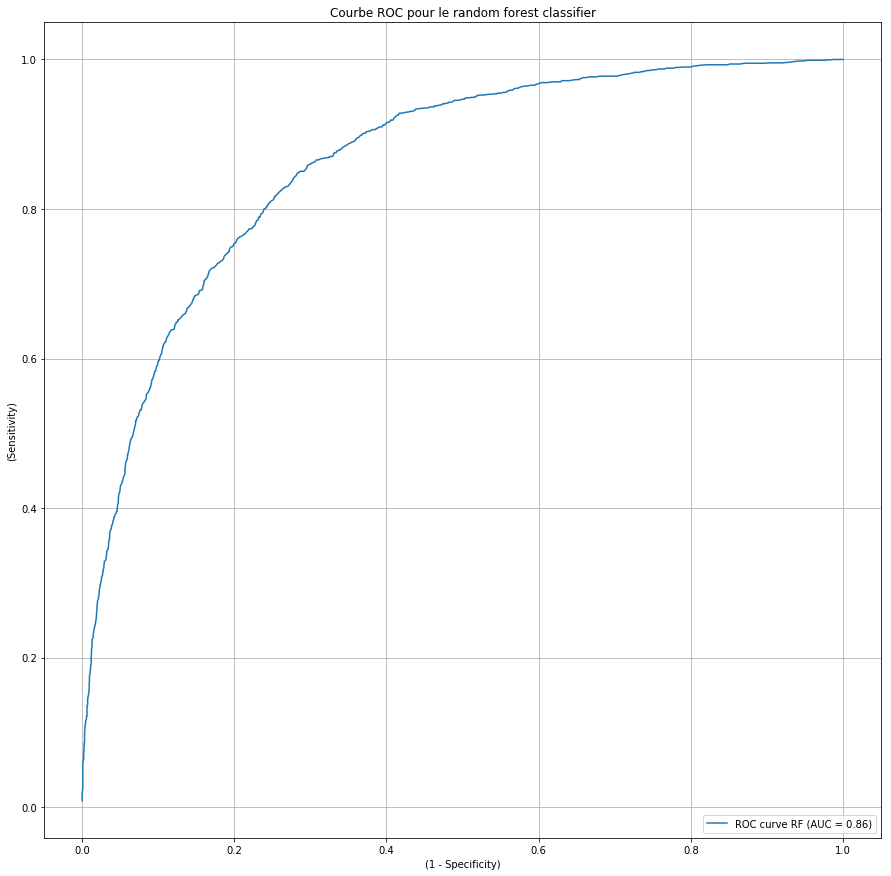

In [304]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(15,15))
rf_pred_prob = rf.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, rf_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve RF (AUC = %0.2f)' % roc_auc)
plt.title("Courbe ROC pour le random forest classifier")
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [305]:
import lightgbm as lgm
lgbm = lgm.LGBMClassifier(objective='binary', class_weight='balanced')
lgbm.fit(train_features, train_labels);
predictions = lgbm.predict(test_features)

print("Accuracy: {:.2f}%".format(metrics.accuracy_score(test_labels, predictions)*100));

Accuracy: 76.93%


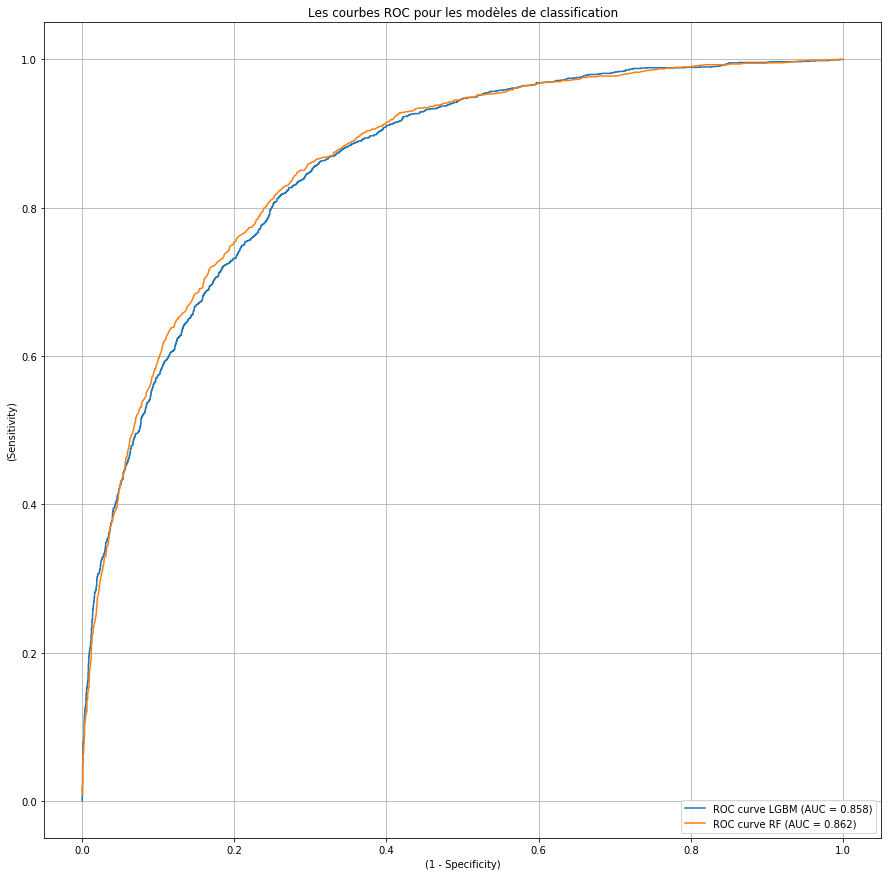

In [306]:
plt.figure(figsize=(15,15))
lgbm_pred_prob = lgbm.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, lgbm_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve LGBM (AUC = %0.3f)' % roc_auc)
rf_pred_prob = rf.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, rf_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve RF (AUC = %0.3f)' % roc_auc)
plt.title("Les courbes ROC pour les modèles de classification")
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [307]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(train_features, train_labels);
predictions = ab.predict(test_features)
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(test_labels, predictions)*100))

Accuracy: 75.91%


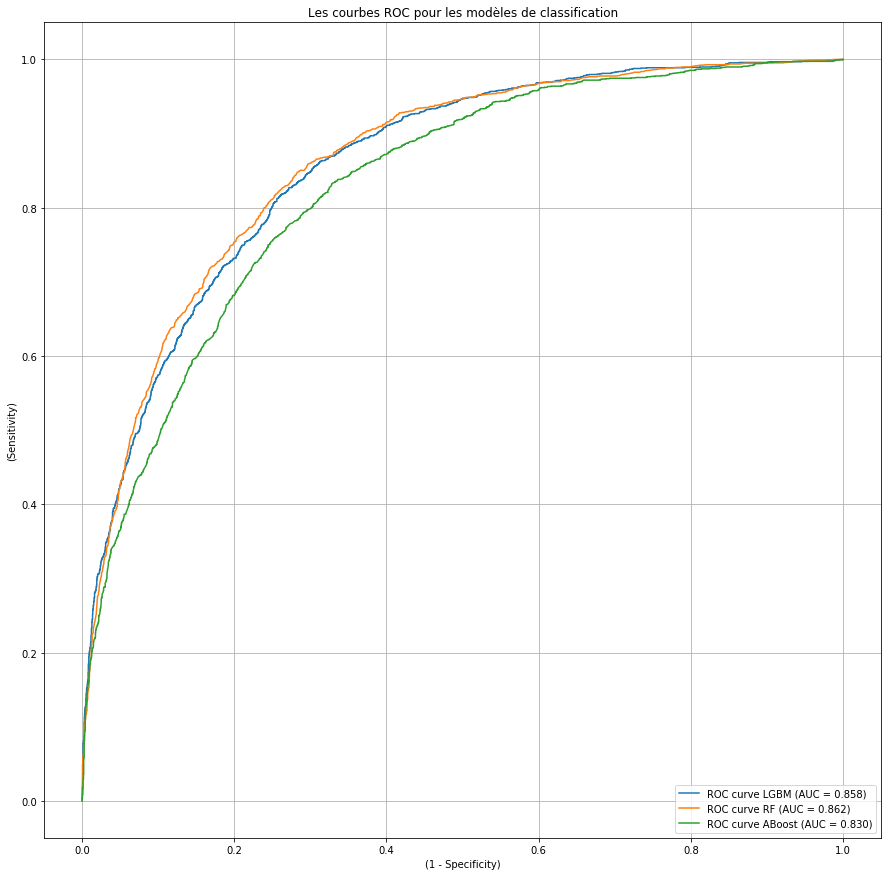

In [308]:
plt.figure(figsize=(15,15))
lgbm_pred_prob = lgbm.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, lgbm_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve LGBM (AUC = %0.3f)' % roc_auc)
rf_pred_prob = rf.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, rf_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve RF (AUC = %0.3f)' % roc_auc)
ab_pred_prob = ab.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, ab_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve ABoost (AUC = %0.3f)' % roc_auc)
plt.title("Les courbes ROC pour les modèles de classification")
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [309]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_features, train_labels);
predictions = gb.predict(test_features)
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(test_labels, predictions)*100))

Accuracy: 76.24%


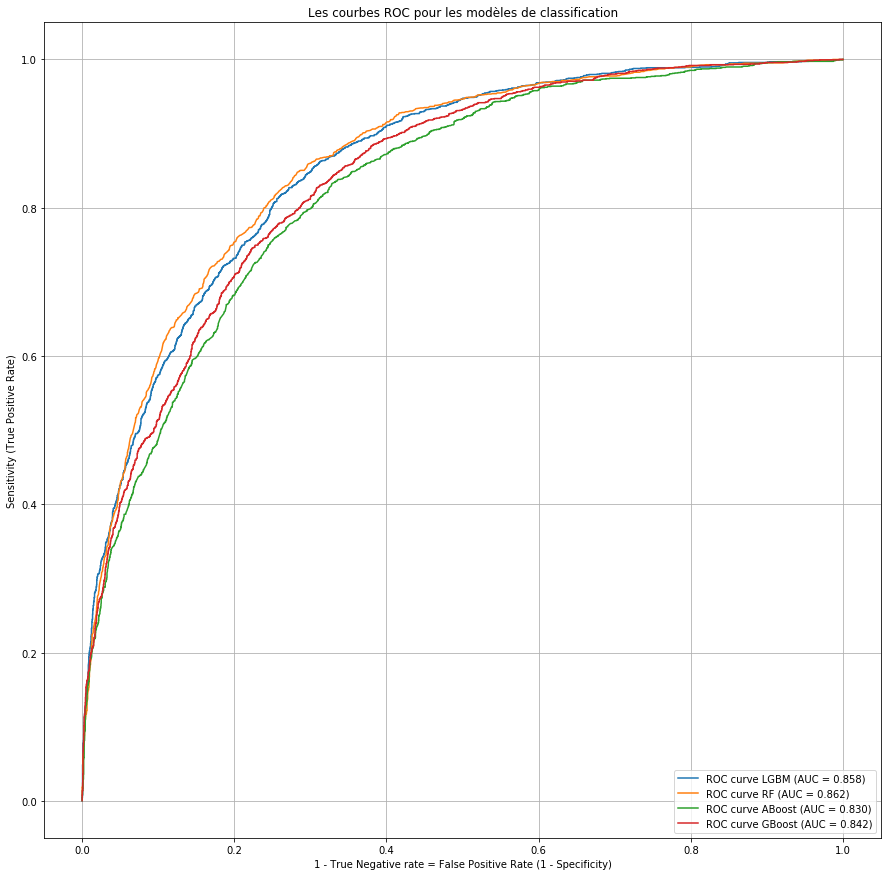

In [310]:
plt.figure(figsize=(15,15))
lgbm_pred_prob = lgbm.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, lgbm_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve LGBM (AUC = %0.3f)' % roc_auc)
rf_pred_prob = rf.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, rf_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve RF (AUC = %0.3f)' % roc_auc)
ab_pred_prob = ab.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, ab_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve ABoost (AUC = %0.3f)' % roc_auc)
gb_pred_prob = gb.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, gb_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve GBoost (AUC = %0.3f)' % roc_auc)
plt.title("Les courbes ROC pour les modèles de classification")
plt.xlabel('1 - True Negative rate = False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

Après tout test et modélisation effectuée, on est sûr ainsi qu'on essaiera de prendre comme pseudo solution, le modèle issue par le forêt aléatoire. Et suite à sa courbe ROC associée, ce qu'on essaiera de faire, est de minimiser le taux des faux positives vu que notre variable cible est la modalité "Indemne". C'est évident donc qu'on essaiera de minimiser le taux des faux positives: Induire en des fausses alertes de morts en accidents est mieux qu'induire des fausses alertes d'indemnité en cas d'accident.

In [311]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 49,
 'verbose': 0,
 'warm_start': False}


Les paramètres utilisées par notre modèle jusqu'à présent (le forêt aléatoire)
- <strong>n_estimators</strong> = Nombre des arbres dans le forêt aléatoire

- <strong>max_features</strong> = Nombre maximal de variables (features) considérées pour le fractionnement d'un noeud

- <strong>max_depth</strong> = Nombre maximal de niveaux dans chaque arbre

- <strong>min_samples_split</strong> = Nombre minimal des points de données (observations/lignes) placés dans un noeud avant le fractionnement

- <strong>min_samples_leaf</strong> = Nombre minimal des observations permises dans un noeud feuille (noeud terminal)

- <strong>bootstrap</strong> = Méthode d'échantillonage des observations / points des données (avec/sans remplacement)

In [312]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [325]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3,
                               verbose=False, random_state=49, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [330]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = metrics.accuracy_score(test_labels, predictions)*100
    print("Accuracy: {:.2f}%".format(metrics.accuracy_score(test_labels, predictions)*100))
    return accuracy

base_model = RandomForestClassifier(n_estimators = 1000, random_state = 49)
base_model.fit(train_features, train_labels)
print('Base Model Performance')
base_accuracy = evaluate(base_model, test_features, test_labels)
print('Boosted Model Performance')
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

print('Improvement of {:0.2f}%.'.format(100 * (random_accuracy - base_accuracy) / base_accuracy))

Base Model Performance
Accuracy: 79.00%
Boosted Model Performance
Accuracy: 78.93%
Improvement of -0.09%.


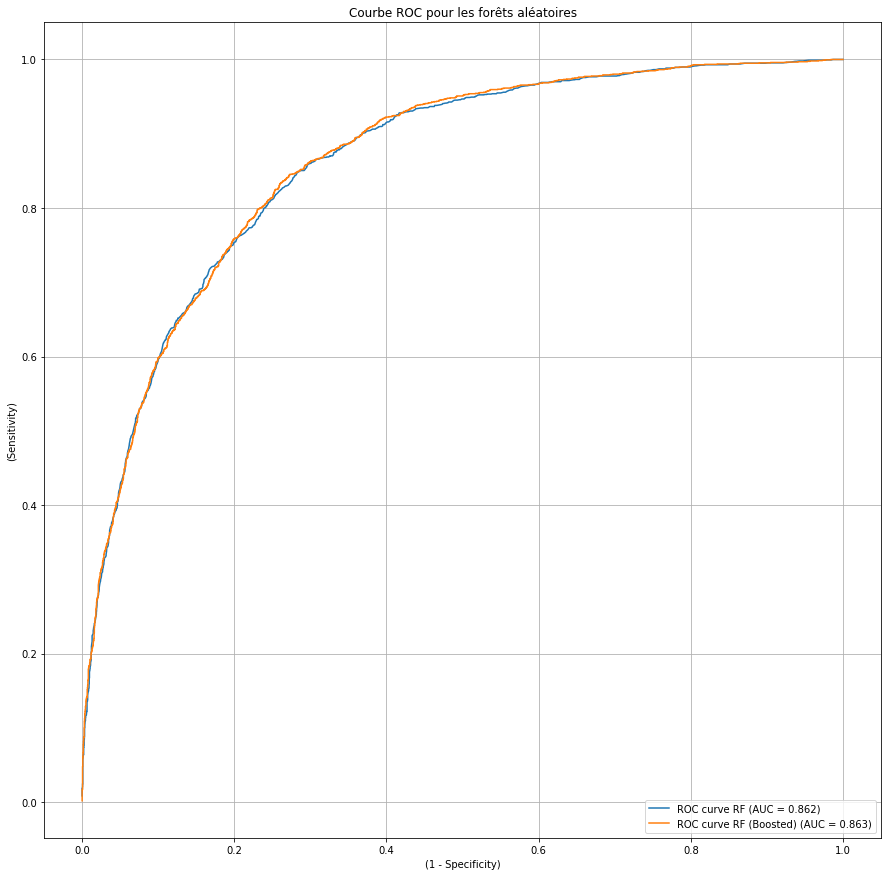

In [336]:
plt.figure(figsize=(15,15))
rf_pred_prob = rf.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, rf_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve RF (AUC = %0.3f)' % roc_auc)
rfrn_pred_prob = best_random.predict_proba(test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, rfrn_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr,label='ROC curve RF (Boosted) (AUC = %0.3f)' % roc_auc)
plt.title("Courbe ROC pour les forêts aléatoires")
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

Voilà donc qu'en essayant de renforcer notre modèle, on a diminué malheureusement sa précision par 0.09% mais par contre, on a augmenté l'AUC par 0.1%, ce qui n'est pas surprenant, mais toujours considérable vu qu'on est entrain de traiter un problème lié à l'appel de l'assistance médicale en cas d'alerte d'accident. (Selon la moyenne de ces 8 années étudiées, 0.1% correspond à 4 personnes sauvés de plus).

Après ces tentatives de renforcement de notre modèle, il est temps de l'exporter pour l'utiliser dans <strong>notre application en déploiement</strong> et passer vers notre deuxième modélisation.

In [374]:
import pickle
# save the model to disk
filename = 'indemnite_classification_model.sav'
pickle.dump(best_random, open(filename, 'wb'))
# some time later...
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

Passons maintenant à la deuxième modélisation, où on essaiera de prévoir le nombre d'accidents par commune et/ou par département.

Dans cette partie, vu que le temps est le plus important des facteurs étudiés, on se retrouve obligés de mener une étude temporelle du sujet, c'est pourquoi qu'on sera amené à modéliser le problème sous la forme d'une série temporelle.

In [421]:
sns.set()
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from copy import deepcopy
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Functions we'll find useful in our analysis:

"""Plots a simple serie in PLOTLY."""
def jsplot(dates , values , mode = 'lines+markers'):

    data = [go.Scatter(
              x=dates,
              y=values,
              mode = mode)]

    iplot(data)
    
    
"""Plot multiple series in PLOTLY:"""
def jsplot_multiple(dates , values , mode = 'lines+markers'):

    data = []
    for col in values.columns:
        splot = go.Scatter(
                        x=dates,
                        y=values[col],
                        mode = mode,
                        name = str(col) )
        data.append(splot)

    iplot(data)
    
    
"""Function that test the stationarity of a Time series by
computing and plotting rolling statistics, and then by performing
An augmented Dickey Fuller test.""" 

def test_stationarity(timeseries , window = 50):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries,label='Original')
    mean = plt.plot(rolmean, color='red' , label='Rolling Mean')
    std = plt.plot(rolstd, label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    try:
        dftest = adfuller(timeseries.dropna(), autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput) 
    except:
        print('test failed')
        

        
"""Performs Acp - Pacp Analysis on a time serie."""
def acp_pacp(timeseries , nlags = 30):
    lag_acf = acf(timeseries, nlags=nlags)
    lag_pacf = pacf(timeseries, nlags=nlags, method='ols')
    
    print('lag_acf')
    fig = plt.figure(figsize=(7 , 6))

    sns.barplot( np.arange(len(lag_acf)) , lag_acf , palette = 'GnBu_d')
    
    
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')

    plt.show()
    print('lag_pacf')
    fig = plt.figure(figsize=(7, 6))

    sns.barplot( np.arange(len(lag_pacf)) , lag_pacf , palette = 'GnBu_d')

    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')

    plt.show()

In [454]:
joined_data = []
for i in range(10,18):
    joined_data.append(pd.merge(carac_join[i-10], lieux_list[i-10], how='inner', on='num_acc'))

timeseries_join = joined_data[0]
for i in range(1,8):
    timeseries_join = timeseries_join.append(joined_data[i], ignore_index=True)

print("Liste des colonnes présentes dans le dataset résultant:\n", timeseries_join.columns.tolist())
timeseries_join.head(5)

Liste des colonnes présentes dans le dataset résultant:
 ['num_acc', 'an', 'mois', 'jour', 'heure_min', 'lum', 'localisation', 'intersection', 'meteo', 'type_collision', 'insee', 'categorie_route', 'numero_route', 'regime_circulation', 'nbre_voies', 'voie_reserv_exist', 'declivite_route_acc', 'align_route', 'largeur_tpc', 'largeur_route', 'etat_surface', 'infrastructure', 'local_accident', 'proximite_ecole']


,num_acc,an,mois,jour,heure_min,lum,localisation,intersection,meteo,type_collision,...,nbre_voies,voie_reserv_exist,declivite_route_acc,align_route,largeur_tpc,largeur_route,etat_surface,infrastructure,local_accident,proximite_ecole
0,201000000001,10,6,12,19:30,Plein Jour,En agglomération,Hors intersection,Normale,Autre collision,...,02,Pas définie,Plat,Partie rectiligne,0,60,Normale,Pas définie,Sur chaussée,00
1,201000000005,10,10,25,12:15,Plein Jour,En agglomération,Hors intersection,Normale,Deux véhicules - par l'arrière,...,01,Pas définie,Plat,Partie rectiligne,0,0,Normale,Pas définie,Sur chaussée,99
2,201000000002,10,8,7,10:00,Plein Jour,En agglomération,Hors intersection,Normale,Autre collision,...,00,Pas définie,Plat,Partie rectiligne,0,0,Normale,Pas définie,Sur chaussée,00
3,201000000004,10,9,22,16:30,Plein Jour,En agglomération,Hors intersection,Normale,Autre collision,...,02,Pas définie,Plat,Partie rectiligne,0,68,Normale,Pas définie,Sur chaussée,00
4,201000000003,10,9,11,16:00,Plein Jour,Hors agglomération,Hors intersection,Normale,Trois véhicules et plus - collisions multiples,...,02,Pas définie,Plat,Partie rectiligne,0,61,Normale,Pas définie,Sur chaussée,00


In [455]:
timeseries_join.heure_min = timeseries_join.heure_min.apply(lambda x : int(x[0:2]) * 60 + int(x[3:5]))
timeseries_join.drop(["nom_departement", "nom_commune"], axis=1, inplace=True, errors="ignore")
for colum in ['num_acc', 'an', 'mois', 'jour', 'insee', 'heure_min', 'numero_route', 'nbre_voies',
             'largeur_tpc', 'largeur_route', 'proximite_ecole']:
    timeseries_join[colum] = timeseries_join[colum].apply(lambda x : switch_base_ifneeded(x))

categorical_data = timeseries_join.drop(['num_acc', 'an', 'mois', 'jour', 'insee',
                                        'heure_min', 'numero_route', 'nbre_voies',
                                        'largeur_tpc', 'largeur_route', 'proximite_ecole'], axis=1)

timeseries_join = timeseries_join[['num_acc', 'an', 'mois', 'jour', 'insee',
                                        'heure_min', 'numero_route', 'nbre_voies',
                                        'largeur_tpc', 'largeur_route', 'proximite_ecole']]

for column in categorical_data.columns.values.tolist():
    timeseries_join = pd.concat([timeseries_join,
                                 pd.get_dummies(categorical_data[column]).drop(['Pas définie'],
                                                                               axis=1,
                                                                               errors='ignore')], axis=1)

timeseries_join.head(5)

,num_acc,an,mois,jour,insee,heure_min,numero_route,nbre_voies,largeur_tpc,largeur_route,...,Pont - autopont,Souterrain - tunnel,Voie ferrée,Zone de péage,Zone piétonne,Sur accotement,Sur bande d'arrêt d'urgence,Sur chaussée,Sur piste cyclable,Sur trottoir
0,201000000001,10,6,12,59052,1170,39,2,0,60,...,0,0,0,0,0,0,0,1,0,0
1,201000000005,10,10,25,59052,735,239,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,201000000002,10,8,7,59477,600,39,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,201000000004,10,9,22,59477,990,39,2,0,68,...,0,0,0,0,0,0,0,1,0,0
4,201000000003,10,9,11,59011,960,41,2,0,61,...,0,0,0,0,0,0,0,1,0,0


In [456]:
timeseries_join.an = timeseries_join.an.apply(int)
timeseries_join.mois = timeseries_join.mois.apply(int)
timeseries_join.jour = timeseries_join.jour.apply(int)
timeseries_join.heure_min = timeseries_join.heure_min.apply(int)
timeseries_join['day'] = pd.to_datetime(
    (2000 + timeseries_join.an) * 10000 + timeseries_join.mois * 100 + timeseries_join.jour,format='%Y%m%d'
)
timeseries_join.drop(['jour' , 'mois' , 'an'] , axis = 1 ,inplace = True)
timeseries_join = timeseries_join.sort_values(by=["day", "heure_min"])
timeseries_join.head(5)

,num_acc,insee,heure_min,numero_route,nbre_voies,largeur_tpc,largeur_route,proximite_ecole,Crépuscule ou aube,Nuit avec éclairage public allumé,...,Souterrain - tunnel,Voie ferrée,Zone de péage,Zone piétonne,Sur accotement,Sur bande d'arrêt d'urgence,Sur chaussée,Sur piste cyclable,Sur trottoir,day
40043,201000040487,67482,20,0,1,0,36,0,0,1,...,0,0,0,0,0,0,0,0,1,2010-01-01
10041,201000009150,57634,45,7,2,0,70,0,0,0,...,0,0,0,0,1,0,0,0,0,2010-01-01
30284,201000028688,33063,45,0,0,0,12,0,0,1,...,0,0,0,0,0,0,1,0,0,2010-01-01
30286,201000028690,33063,55,0,6,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2010-01-01
13079,201000011738,13107,75,8,2,0,56,99,0,0,...,0,0,0,0,0,0,1,0,0,2010-01-01


In [515]:
d = {
    "day" : pd.DataFrame(timeseries_join[["num_acc", "day"]]).groupby("day").count().num_acc.index.tolist(),
    "nbr_acc" : pd.DataFrame(timeseries_join[["num_acc", "day"]]).groupby("day").count().num_acc.tolist()
}
timeseries_toplot = pd.DataFrame(data = d)
timeseries_toplot.head(7)

,day,nbr_acc
0,2010-01-01,112
1,2010-01-02,93
2,2010-01-03,78
3,2010-01-04,169
4,2010-01-05,158
5,2010-01-06,158
6,2010-01-07,131


In [600]:
jsplot(timeseries_toplot.day, timeseries_toplot.nbr_acc)

In [832]:
# get x and y vectors
x = timeseries_toplot.day.apply(lambda x : x.value).tolist()
y = timeseries_toplot.nbr_acc.tolist()

# calculate polynomial
factors = np.polyfit(x, y, 8)
reproach_function = np.poly1d(factors)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = reproach_function(x_new)



# fix the annotation
facs = [format(x)[:3]+format(x)[format(x).find("e"):] for x in factors.tolist()]
txt = ""
for i in range(1,8):
    txt = txt + " (" + facs[i] + ")X^" + str(i) + " + "
txt = facs[0] + " + " + txt[:-3]
text='$' + txt + '$'

import plotly.graph_objs as go

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
                  x=x,
                  y=y,
                  mode='lines',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace2 = go.Scatter(
                  x=x_new,
                  y=y_new,
                  mode='lines+markers',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

trace3 = go.Scatter(
                    x = x,
                    y = [sum(y_new) / len(y_new) for x in x],
                    mode = "lines",
                    marker = go.Marker(color="rgb(140, 130, 20)"),
                    name="Mean"
                    )

annotation = go.Annotation(
                  x=1414000000000000000,
                  y=300,
                  text=text[:75] + "$",
                  showarrow=False)

annotation1 = go.Annotation(
                  x=1450000000000000000,
                  y=285,
                  text="$" + text[75:],
                  showarrow=False)

layout = go.Layout(
                title='Polynomial fit for the total number of accidents',
                plot_bgcolor='rgb(229, 229, 229)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  annotations=[annotation, annotation1]
                )

data = [trace1, trace2, trace3]
fig = go.Figure(data=data, layout=layout)

iplot(fig)

En essayant de rapprocher la courbe tracée par un polynôme assez complexe, on est arrivée à obtenir une courbe qui représente le comportement des nombre d'accidents en moyenne pour chaque période. Étant très utile à notre étude, ca reste toujours insuffisant et on a encore besoin de faire du travail pour appréhender la modèle finale de prédiction.

In [773]:
# Accidents Grouped by Day in INSEE = 67482
pd.DataFrame(timeseries_join[["num_acc", "insee",
                              "day"]])[timeseries_join.insee==67482][["num_acc",
                                                                      "day"]].groupby("day").count().head(7)